In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Análise exploratória do Brasileirão de 2021.

In [2]:
# Importação das bibliotecas que serão auxiliares na análise:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importação do dataset do campeonato brasileiro:
# Verificação da quantidade de linhas e colunas, e visualização breve das cinco primeiras linhas do dataframe:
df = pd.read_csv('/content/drive/MyDrive/campeonato-brasileiro-full.csv')
print(df.shape)
df.head()

(7645, 18)


,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-


In [4]:
# Importação do dataset de estatísticas do campeonato brasileiro (2017-2021):
# Verificação da quantidade de linhas e colunas, e visualização breve das cinco linhas do dataframe:
df_2 = pd.read_csv('/content/drive/MyDrive/campeonato-brasileiro-estatisticas-full.csv', sep = ',')
print(df_2.shape)
df_2.head()

(15290, 13)


,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


## (1) Limpeza e tratamento nos dados.

In [5]:
# Informações generalizadas do conjunto de dados (ex: tipo de dados; dados faltantes; uso de memória RAM):
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  7645 non-null   int64 
 1   rodada              7645 non-null   int64 
 2   data                7645 non-null   object
 3   hora                7645 non-null   object
 4   dia                 7645 non-null   object
 5   mandante            7645 non-null   object
 6   visitante           7645 non-null   object
 7   formacao_mandante   2671 non-null   object
 8   formacao_visitante  2671 non-null   object
 9   tecnico_mandante    3035 non-null   object
 10  tecnico_visitante   3035 non-null   object
 11  vencedor            7645 non-null   object
 12  arena               7645 non-null   object
 13  mandante_placar     7645 non-null   int64 
 14  visitante_placar    7645 non-null   int64 
 15  mandante_estado     7645 non-null   object
 16  visitante_estado    7645

In [6]:
# Como foi verificado anteriormente a coluna 'Data' e 'Hora' são do tipo object:
print('A coluna Data é do tipo: ', df['data'].dtype)
print('A coluna Hora é do tipo: ', df['hora'].dtype)

A coluna Data é do tipo:  object
A coluna Hora é do tipo:  object


In [7]:
# Conversão da coluna 'Data' de object para datetime64[ns]:
df['data'] = pd.to_datetime(df['data'], format = '%Y-%m-%d')
df['data'].dtype

dtype('<M8[ns]')

In [8]:
# Verificação dos meses em que o campeonato brasileiro foi ocorrível durante o ano de 2021:
# Há como concluir que há erros em relação aos meses, porque (1) o Brasileirão 2021 foi inicializado em Maio e não em Janeiro,
# e (2) há dois meses adicionais em relação a quantidade de meses real em que o campeonato foi realizável.
df[df['data'].dt.year == 2021].data.dt.month.unique()

array([ 1,  2,  5,  6, 11,  7,  8,  9, 10, 12])

### Basicamente, a justificativa de meses adicionais nos jogos de 2021 do Brasileirão é que parcialmente os jogos ocorrentes em Janeiro e Fevereiro eram jogos pertencentes à tabela do Brasileirão 2020 e não do Brasileirão 2021. 




### À partir de Maio de 2021 é que o Brasileirão 2021 foi inicializado.

In [9]:
# Filtragem exclusiva dos jogos do Brasileirão 2021, excluindo os jogos que tiveram em 2021 que pertenciam ao Brasileirão 2020:
df_br_21 = df[(df['data'].dt.year == 2021) & (df['data'].dt.month.isin([5, 6, 7, 8, 9, 10, 11, 12]))]
print(df_br_21.shape)
df_br_21.head()

(380, 18)


,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
7265,7266,1,2021-05-29,19:00,Sabado,Cuiaba,Juventude,4-3-3,4-2-3-1,E. de Barros,E. de Barros,-,arena pantanal,2,2,MT,RS,-
7266,7267,1,2021-05-29,20:00,Sabado,Bahia,Santos,4-3-3,4-3-3,F. Diniz Silva,F. Diniz Silva,Bahia,estadio de pituacu,3,0,BA,SP,BA
7267,7268,1,2021-05-29,21:00,Sabado,Sao Paulo,Fluminense,3-5-2,4-2-3-1,R. Machado Marques,R. Machado Marques,-,morumbi,0,0,SP,RJ,-
7268,7269,1,2021-05-30,11:01,Domingo,Atletico-MG,Fortaleza,4-2-3-1,3-5-2,J. Vojvoda,J. Vojvoda,Fortaleza,mineirao,1,2,MG,CE,CE
7269,7270,1,2021-05-30,16:00,Domingo,Flamengo,Palmeiras,4-2-3-1,3-5-2,A. Moreira Ferreira,A. Moreira Ferreira,Flamengo,maracana,1,0,RJ,SP,RJ


In [10]:
# Filtragem exclusiva das estatísticas dos jogos ocorríveis no Brasileirão 2021:
df_br_est_21 = df_2.loc[(df_2['partida_id'] >=  7266) & (df_2['partida_id'] <= 7645)]
print(df_br_est_21.shape)
df_br_est_21.head()

(760, 13)


,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
14530,7266,1,Cuiaba,14,2,60%,490,85%,14,1,0,0,9
14531,7266,1,Juventude,7,3,40%,342,77%,14,3,0,1,1
14532,7267,1,Bahia,5,3,34%,304,75%,18,3,0,2,4
14533,7267,1,Santos,12,4,66%,563,88%,9,3,0,2,11
14534,7268,1,Sao Paulo,7,3,72%,636,87%,10,1,0,2,4


In [11]:
# Informações generalizadas das colunas de estatísticas do Brasileirão 2021:
df_br_est_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 14530 to 15289
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       760 non-null    int64 
 1   rodada           760 non-null    int64 
 2   clube            760 non-null    object
 3   chutes           760 non-null    int64 
 4   chutes_no_alvo   760 non-null    int64 
 5   posse_de_bola    760 non-null    object
 6   passes           760 non-null    int64 
 7   precisao_passes  760 non-null    object
 8   faltas           760 non-null    int64 
 9   cartao_amarelo   760 non-null    int64 
 10  cartao_vermelho  760 non-null    int64 
 11  impedimentos     760 non-null    int64 
 12  escanteios       760 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 83.1+ KB


In [12]:
# Conversão das colunas 'Precisão_de_passe' e 'Posse_de_bola' de object para tipo float, para que seja possível obter à média
# aritmética de cada coluna:
df_br_est_21.loc[:, 'precisao_passes'] = df_br_est_21['precisao_passes'].str.replace('%', '').astype(float)
df_br_est_21.loc[:, 'posse_de_bola'] = df_br_est_21['posse_de_bola'].str.replace('%', '').astype(float)
print('A coluna Posse_de_bola é do tipo: ', df_br_est_21['posse_de_bola'].dtype)
print('A coluna Precisão_de_passe é do tipo: ', df_br_est_21['precisao_passes'].dtype)
print('\n')

A coluna Posse_de_bola é do tipo:  float64
A coluna Precisão_de_passe é do tipo:  float64




/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
# Renomeação das colunas 'Precisão_de_passe' e 'Posse_de_bola' para um acréscimo nominal de '%' para informar que tais colunas 
# representam porcentagem de posse de bola e precisão de passe do time de cada partida:
df_br_est_21.rename(columns = {'precisao_passes': '%_precisão_de_passe',
                     'posse_de_bola': '%_posse_de_bola'}, inplace = True)
df_br_est_21.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['partida_id', 'rodada', 'clube', 'chutes', 'chutes_no_alvo',
       '%_posse_de_bola', 'passes', '%_precisão_de_passe', 'faltas',
       'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios'],
      dtype='object')

In [14]:
# A média aritmética de cada coluna de estatísticas dos jogos do Brasileirão 2021:
df_br_est_21.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


partida_id             7455.500000
rodada                   19.500000
chutes                   12.709211
chutes_no_alvo            4.135526
%_posse_de_bola          50.000000
passes                  425.801316
%_precisão_de_passe      80.419737
faltas                   14.961842
cartao_amarelo            2.210526
cartao_vermelho           0.106579
impedimentos              1.368421
escanteios                5.102632
dtype: float64

In [15]:
df_br_21.columns

Index(['ID', 'rodada', 'data', 'hora', 'dia', 'mandante', 'visitante',
       'formacao_mandante', 'formacao_visitante', 'tecnico_mandante',
       'tecnico_visitante', 'vencedor', 'arena', 'mandante_placar',
       'visitante_placar', 'mandante_estado', 'visitante_estado',
       'estado_vencedor'],
      dtype='object')

In [16]:
# Criação de uma nova coluna que informa a quantidade de gols de cada partida:
df_br_21['gols_na_partida'] = df_br_21['mandante_placar'] + df_br_21['visitante_placar']
df_br_21['gols_na_partida']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


7265    4
7266    3
7267    0
7268    3
7269    1
       ..
7640    1
7641    2
7642    1
7643    7
7644    2
Name: gols_na_partida, Length: 380, dtype: int64

In [17]:
# Soma cumulativa da quantidade de gols por partida que irá resultar na quantidade de gols em todo o Brasileirão 2021:
df_br_21['gols_na_partida'].cumsum()

7265      4
7266      7
7267      7
7268     10
7269     11
       ... 
7640    830
7641    832
7642    833
7643    840
7644    842
Name: gols_na_partida, Length: 380, dtype: int64

### 842 gols é a quantidade de gols contáveis em todo o Brasileirão 2021.

### À partir dessa informação, poderemos nos perguntar:

## (1) Quais Brasileirões de quais anos que tiveram mais gols marcados em todo o campeonato?

In [18]:
# Criação de uma coluna para representarmos o ano em que cada jogo foi realizado e ao Brasileirão de qual ano tal jogo é pertencente:
df['ano_brasileirao'] = df.data.dt.year
df.ano_brasileirao

0       2003
1       2003
2       2003
3       2003
4       2003
        ... 
7640    2021
7641    2021
7642    2021
7643    2021
7644    2021
Name: ano_brasileirao, Length: 7645, dtype: int64

In [19]:
df['gols_na_partida'] = df['mandante_placar'] + df['visitante_placar']
df['gols_na_partida']

0       6
1       2
2       2
3       4
4       2
       ..
7640    1
7641    2
7642    1
7643    7
7644    2
Name: gols_na_partida, Length: 7645, dtype: int64

In [20]:
# Agrupamento da quantidade de gols totais em todo o Brasileirão de cada ano:
df_gols_br = df.groupby(df['data'].dt.year)[['gols_na_partida']].sum().reset_index().sort_values('data', ascending = True)
print(df_gols_br.shape)
df_gols_br

(19, 2)


,data,gols_na_partida
0,2003,1592
1,2004,1534
2,2005,1451
3,2006,1030
4,2007,1047
5,2008,1035
6,2009,1094
7,2010,978
8,2011,1017
9,2012,940


### Há jogos em 2021 que foram realizados durante Janeiro e Fevereiro, e são pertencentes ao Brasileirão 2020, e não ao de 2021.

### Como obtivemos anteriormente a informação de que no Brasileirão 2021 tiveram 842 gols marcados, então podemos calcular a diferença entre 1132 de gols marcados no ano de 2021 com os 842 gols marcados no Brasileirão 2021 que iremos saber exatamente a quantidade de gols marcados acrescentados ao Brasileirão 2020.

In [21]:
print('Quantos gols em 2021 são pertencentes ao Brasileirão 2020: ', 1132 - 842)
print('\n')
print('A quantidade de gols marcados no Brasileirão 2020 foram: ', 290 + 654)

Quantos gols em 2021 são pertencentes ao Brasileirão 2020:  290


A quantidade de gols marcados no Brasileirão 2020 foram:  944


#### Interessantemente, no Brasileirão 2020 teve mais gols marcados do que no Brasileirão 2021. No Brasileirão 2021 foram 842 gols marcados, no Brasileirão 2020 em comparação foram 944 gols marcados.

In [22]:
# Exclusão das linhas dos anos de 2020 e 2021 para poder corrigi-los manualmente:
df_gols_br.drop(index = [17, 18], inplace = True)

In [23]:
# Adição corrigida de linhas em relação a quantidade de gols de 2020 e 2021:
df_gols_br.loc[17, :] = [2020, 944]
df_gols_br.loc[18, :] = [2021, 842]
df_gols_br[['data', 'gols_na_partida']] = df_gols_br[['data', 'gols_na_partida']].astype(int)
df_gols_br

,data,gols_na_partida
0,2003,1592
1,2004,1534
2,2005,1451
3,2006,1030
4,2007,1047
5,2008,1035
6,2009,1094
7,2010,978
8,2011,1017
9,2012,940


In [24]:
# Renomeação da coluna 'Data' e 'Gols_Na_Partida' para 'Brasileirão' como nome do ano de cada Brasileirão e
# 'Total_De_Gols' para representar o total de gols de cada ano do campeonato brasileiro:
df_gols_br.rename(columns = {'data': 'brasileirão',
                             'gols_na_partida': 'total_de_gols'}, inplace = True)
df_gols_br.columns

Index(['brasileirão', 'total_de_gols'], dtype='object')

In [25]:
# Os 5 anos do Brasileirão entre 2003 e 2021 que tiveram mais gols marcados durante todo o campeonato:
df_gols_br.sort_values(by = 'total_de_gols', ascending = False).head()

,brasileirão,total_de_gols
0,2003,1592
1,2004,1534
2,2005,1451
6,2009,1094
4,2007,1047


In [26]:
# Os 5 anos do Brasileirão entre 2003 e 2021 que tiveram menos gols marcados durante todo o campeonato:
df_gols_br.sort_values(by = 'total_de_gols', ascending = True).head()

,brasileirão,total_de_gols
15,2018,827
18,2021,842
11,2014,860
16,2019,876
12,2015,897


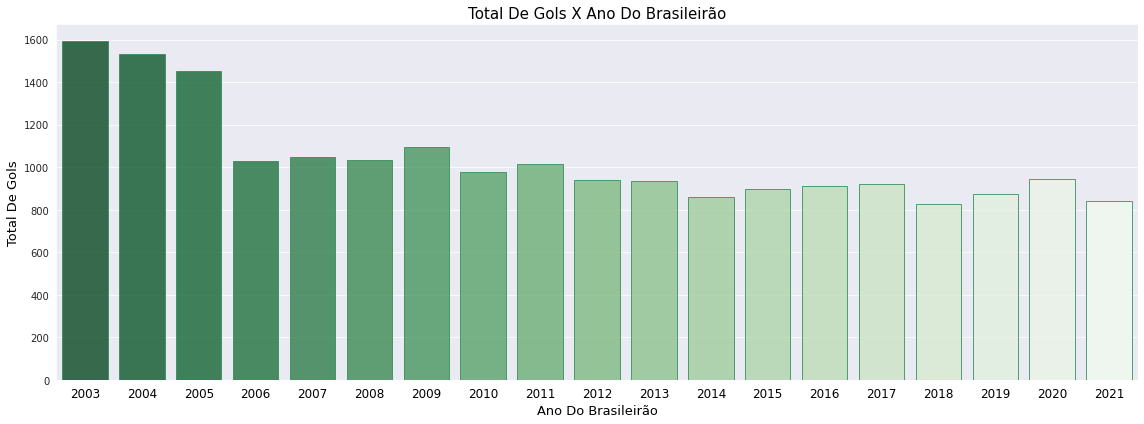

In [27]:
# Gráfico de colunas para representar visualmente a quantidade de gols em cada ano do campeonato brasileiro
# Desde 2003 até 2021 consecutivamente:
sns.set_style('darkgrid')
ax = sns.barplot(data = df_gols_br,
            x = 'brasileirão',
            y = 'total_de_gols',
            palette = 'Greens_r',
            alpha = 0.8,
            edgecolor = 'seagreen')
ax.figure.set_size_inches(16, 6)
ax.set_xlabel('Ano Do Brasileirão', fontsize = 13, color = 'k')
ax.set_ylabel('Total De Gols', fontsize = 13, color = 'k')
ax.set_xticklabels(df_gols_br.brasileirão.to_list(), fontsize = 12, color = 'k')
ax.set_title('Total De Gols X Ano Do Brasileirão', fontsize = 15, color = 'k')
plt.tight_layout();

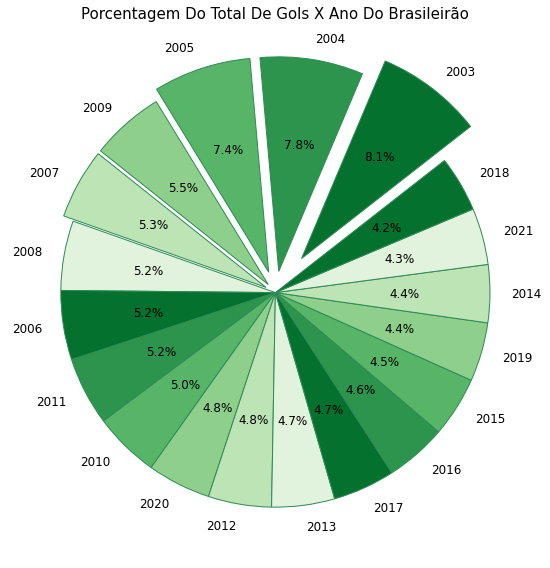

In [28]:
# Gráfico de pizza para representar percentualmente o total de gols por cada ano do Brasileirão entre 2003 até 2021:
lista_3 = [0.2, 0.1, 0.1, 0.05, 0.05]
for i in lista_3:
  if (len(lista_3) < 19):
    lista_3.append(0.0)
cores = sns.color_palette('Greens_r')
plt.figure(figsize = (16, 8))
plt.pie(x = df_gols_br.sort_values('total_de_gols', ascending = False).total_de_gols.to_list(), labels = df_gols_br.sort_values('total_de_gols', ascending = False
                                                                                                                                ).brasileirão.to_list(),
        wedgeprops = {'edgecolor': 'seagreen'}, textprops = {'color': 'k', 'fontsize': 12},
        autopct = '%1.1f%%', colors = cores, explode = lista_3, startangle = 38)
plt.title('Porcentagem Do Total De Gols X Ano Do Brasileirão', fontsize = 15, color = 'k')
plt.tight_layout();

### RESPOSTA DE (1) - 2003, 2004, 2005, 2009 e 2007 consecutivamente foram os anos em que tiveram mais gols marcados no campeonato brasileiro, em comparação aos anos de 2018, 2021, 2014, 2019 e 2015 que foram os Brasileirões com menos gols marcados.

In [29]:
# Modificar o formato textual dos dados da coluna 'Arena' de letras minúsculas para o formato título:
df_br_21.arena = df_br_21.arena.apply(lambda x : x.title())
df_br_21.arena

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


7265             Arena Pantanal
7266         Estadio De Pituacu
7267                    Morumbi
7268                   Mineirao
7269                   Maracana
                 ...           
7640                    Nabizao
7641        Arena De Pernambuco
7642             Alfredo Jaconi
7643            Arena Do Gremio
7644    Estadio Urbano Caldeira
Name: arena, Length: 380, dtype: object

## (2) Quais foram os times que venceram mais partidas no Brasileirão 2021?

In [30]:
# Times que mais venceram partidas em ordem decrescente:
df_br_21.vencedor.value_counts()

-                113
Atletico-MG       26
Flamengo          21
Palmeiras         20
Fortaleza         17
Fluminense        15
Corinthians       15
Bragantino        14
Athletico-PR      13
Atletico-GO       13
America-MG        13
Santos            12
Internacional     12
Gremio            12
Bahia             11
Ceara             11
Juventude         11
Sao Paulo         11
Cuiaba            10
Sport              9
Chapecoense        1
Name: vencedor, dtype: int64

In [31]:
# Porcentagem de partidas vencidas por cada time em ordem decrescente:
(df_br_21.vencedor.value_counts(normalize = True) * 100).round(2)

-                29.74
Atletico-MG       6.84
Flamengo          5.53
Palmeiras         5.26
Fortaleza         4.47
Fluminense        3.95
Corinthians       3.95
Bragantino        3.68
Athletico-PR      3.42
Atletico-GO       3.42
America-MG        3.42
Santos            3.16
Internacional     3.16
Gremio            3.16
Bahia             2.89
Ceara             2.89
Juventude         2.89
Sao Paulo         2.89
Cuiaba            2.63
Sport             2.37
Chapecoense       0.26
Name: vencedor, dtype: float64

In [32]:
# Atribuição da quantidade de vitórias de cada time à uma variável do tipo lista e
# exclusão da quantidade de vitórias contáveis de todos os times:
lista_4 = df_br_21.vencedor.value_counts().to_list()
lista_4.pop(0)
lista_4

[26, 21, 20, 17, 15, 15, 14, 13, 13, 13, 12, 12, 12, 11, 11, 11, 11, 10, 9, 1]

In [33]:
# Atribuição dos times mais vencedores à uma variável do tipo lista e
# exclusão do primeiro elemento que é um traço sem qualquer significância:
lista_5 = df_br_21.vencedor.value_counts().index.to_list()
lista_5.pop(0)
lista_5 = ['Atlético-MG',
 'Flamengo',
 'Palmeiras',
 'Fortaleza',
 'Fluminense',
 'Corinthians',
 'Bragantino',
 'Athletico-PR',
 'Atlético-GO',
 'América-MG',
 'Santos',
 'Internacional',
 'Grêmio',
 'Bahia',
 'Ceará',
 'Juventude',
 'São Paulo',
 'Cuiabá',
 'Sport',
 'Chapecoense']
lista_5

['Atlético-MG',
 'Flamengo',
 'Palmeiras',
 'Fortaleza',
 'Fluminense',
 'Corinthians',
 'Bragantino',
 'Athletico-PR',
 'Atlético-GO',
 'América-MG',
 'Santos',
 'Internacional',
 'Grêmio',
 'Bahia',
 'Ceará',
 'Juventude',
 'São Paulo',
 'Cuiabá',
 'Sport',
 'Chapecoense']

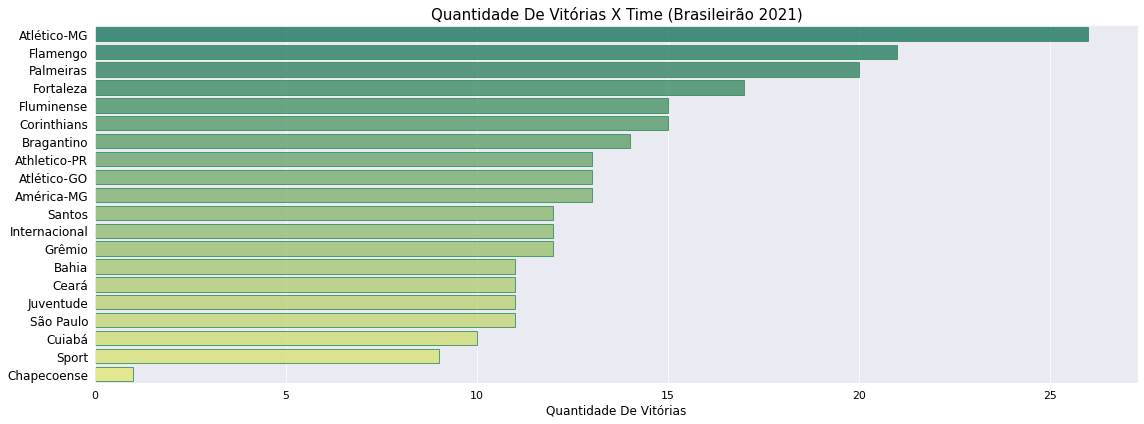

In [34]:
# Gráfico de barras horizontais para representar visualmente a quantidade de vitórias por time:
ax = sns.barplot(x = lista_4,
                 y = lista_5,
                 alpha = 0.8,
                 palette = 'summer',
                edgecolor = 'seagreen',
                )
ax.figure.set_size_inches(16, 6)
ax.set_yticklabels(labels = lista_5, color = 'k', fontsize = 12)
ax.set_xlabel('Quantidade De Vitórias', fontsize = 12, color = 'k')
ax.set_xticklabels(labels = [0, 5, 10, 15, 20, 25], color = 'k', fontsize = 11)
ax.set_title('Quantidade De Vitórias X Time (Brasileirão 2021)', color = 'k', fontsize = 15)
plt.tight_layout();

### RESPOSTA DE (2) - Pelo gráfico de barras horizontais acima é observável conspicuamente que os cinco (ou seis) times que mais contabilizaram vitórias foram o Atlético Mineiro, Flamengo, Palmeiras, Fortaleza, Fluminense e Corinthians empatados.

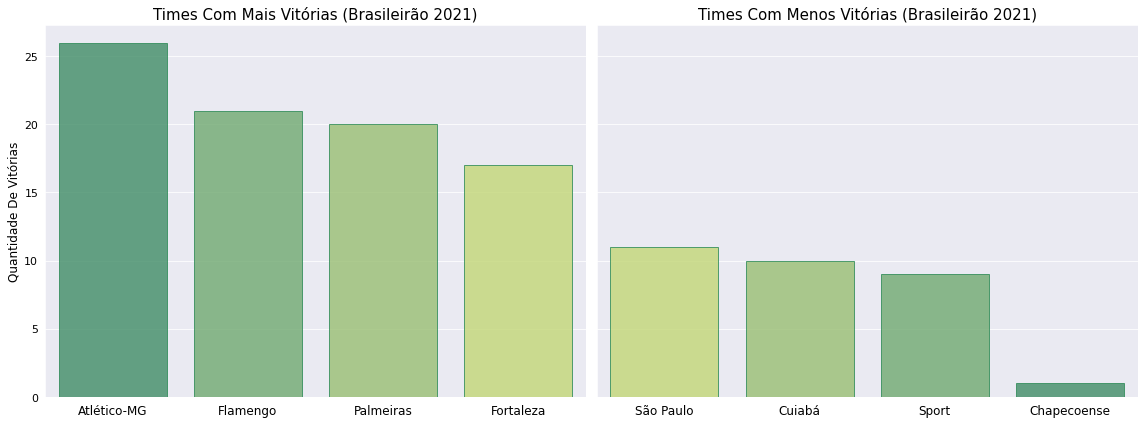

In [35]:
# Recorte visual dos quatro times que mais contabilizaram e menos contabilizaram vitórias no Brasileirão 2021:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True)
sns.barplot(ax = ax[0], y = lista_4[:4],
                 x = lista_5[:4],
                 alpha = 0.8,
                 palette = 'summer',
                edgecolor = 'seagreen',
                )
ax[0].figure.set_size_inches(16, 6)
ax[0].set_xticklabels(labels = lista_5, color = 'k', fontsize = 12)
ax[0].set_ylabel('Quantidade De Vitórias', fontsize = 12, color = 'k')
ax[0].set_yticklabels(labels = [0, 5, 10, 15, 20, 25], color = 'k', fontsize = 11)
ax[0].set_title('Times Com Mais Vitórias (Brasileirão 2021)', color = 'k', fontsize = 15)
sns.barplot(ax = ax[1], y = lista_4[-4:],
                 x = lista_5[-4:],
                 alpha = 0.8,
                 palette = 'summer_r',
                edgecolor = 'seagreen',
                )
ax[1].figure.set_size_inches(16, 6)
ax[1].set_xticklabels(labels = lista_5[-4:], color = 'k', fontsize = 12)
ax[1].set_title('Times Com Menos Vitórias (Brasileirão 2021)', color = 'k', fontsize = 15)
plt.tight_layout();

### O time campeão do Brasileirão 2021 foi o Atlético Mineiro e intuitivamente é expectante que este tenha sido o time com mais vitórias no campeonato todo, o Flamengo foi o vice-campeão, o Palmeiras teve o término em terceiro lugar e o Fortaleza em quarto lugar na tabela do Brasileirão 2021.

### Inesperadamente, os únicos times dos quatro times com menos vitórias que foram rebaixados para a série B foram o Sport e o Chapecoense.

### Disto há como afirmarmos que caso um time seja um dos times com menos vitórias no campeonato brasileiro, isso não implica necessariamente que tal time será rebaixado, como neste caso o Grêmio teve mais vitórias do que o São Paulo e o Bahia teve mais vitórias que o Cuiabá. No entanto, o Grêmio e o Bahia foram rebaixados, o São Paulo e o Cuiabá, não.

In [36]:
df_br_21.rename(columns = {'mandante': 'time_mandante',
                           'visitante': 'time_visitante'}, inplace = True)
df_br_21.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['ID', 'rodada', 'data', 'hora', 'dia', 'time_mandante',
       'time_visitante', 'formacao_mandante', 'formacao_visitante',
       'tecnico_mandante', 'tecnico_visitante', 'vencedor', 'arena',
       'mandante_placar', 'visitante_placar', 'mandante_estado',
       'visitante_estado', 'estado_vencedor', 'gols_na_partida'],
      dtype='object')

In [37]:
# Agrupamento dos times com mais vitórias dentro de "casa":
df_br_21[df_br_21['mandante_placar'] > df_br_21['visitante_placar']].groupby('time_mandante').agg({'vencedor': 'count'}).reset_index().sort_values('vencedor', ascending = False).head(5)

,time_mandante,vencedor
3,Atletico-MG,17
9,Flamengo,13
10,Fluminense,11
15,Palmeiras,11
11,Fortaleza,11


In [38]:
# Agrupamento dos times com mais vitórias fora de "casa":
df_br_21[df_br_21['visitante_placar'] > df_br_21['mandante_placar']].groupby('time_visitante').agg({'vencedor': 'count'}).reset_index().sort_values('vencedor', ascending = False).head(5)

,time_visitante,vencedor
3,Atletico-MG,9
16,Palmeiras,9
10,Flamengo,8
2,Atletico-GO,7
5,Bragantino,7


### Comparativamente, os times apresentam uma vantagem de vitórias ao jogarem dentro de casa do que ao jogarem fora de casa.

### Como esperado o Atlético Mineiro foi o time com mais vitórias dentro e fora de casa no Brasileirão como um todo, o Palmeiras juntamente ao Atlético Mineiro foi um dos times com vitórias fora de casa também. Os times que terminaram no G4 da tabela do Brasileirão 2021 foram os que mais contabilizaram vitórias dentro e fora de casa; 

## (3) Quais times que mais empataram no Brasileirão 2021?

In [39]:
# Agrupamento dos times que mais empataram dentro de casa no Brasileirão 2021 em ordem decrescente:
df_emp_man_21 = df_br_21[df_br_21['vencedor'] == '-'].groupby('time_mandante').agg({'vencedor':'size'}).reset_index().sort_values('vencedor', ascending = False)
print(df_emp_man_21.shape)
df_emp_man_21.head()

(20, 2)


,time_mandante,vencedor
2,Atletico-GO,10
18,Sao Paulo,9
5,Bragantino,9
19,Sport,7
6,Ceara,7


In [40]:
# Agrupamento dos times que mais empataram fora de casa no Brasileirão 2021 em ordem decrescente:
df_emp_vis_21 = df_br_21[df_br_21['vencedor'] == '-'].groupby('time_visitante').agg({'vencedor':'size'}).reset_index().sort_values('vencedor', ascending = False)
print(df_emp_vis_21.shape)
df_emp_vis_21.head()

(20, 2)


,time_visitante,vencedor
9,Cuiaba,11
6,Ceara,10
0,America-MG,8
17,Santos,8
15,Juventude,7


In [41]:
# Renomeação das colunas de cada dataframe de empates dentro e fora de casa para facilitar no merge entre ambos dataframes:
df_emp_man_21.rename(columns = {'time_mandante': 'time',
                                'vencedor': 'qtd_empates_dentro'}, inplace = True)
df_emp_vis_21.rename(columns = {'time_visitante': 'time',
                                'vencedor': 'qtd_empates_fora'}, inplace = True)

In [42]:
# Merge entre os dois dataframes da quantidade de empates dentro e fora de casa:
df_emp_21 = df_emp_man_21.merge(df_emp_vis_21, how = 'inner', on = 'time')
print(df_emp_21.shape)
df_emp_21.head()

(20, 3)


,time,qtd_empates_dentro,qtd_empates_fora
0,Atletico-GO,10,4
1,Sao Paulo,9,6
2,Bragantino,9,5
3,Sport,7,4
4,Ceara,7,10


In [43]:
# Criação de uma nova coluna que representa a quantidade total de empates de cada time no Brasileirão 2021:
df_emp_21['total_empates'] = df_emp_21.qtd_empates_dentro + df_emp_21.qtd_empates_fora

In [44]:
# Ordenação do total de empates de cada time em ordem decrescente:
df_emp_21.sort_values(by = 'total_empates', ascending = False, inplace = True)
df_emp_21[['time', 'total_empates']]

,time,total_empates
10,Cuiaba,17
4,Ceara,17
1,Sao Paulo,15
6,Santos,14
9,America-MG,14
0,Atletico-GO,14
2,Bragantino,14
7,Juventude,13
8,Internacional,12
11,Chapecoense,12


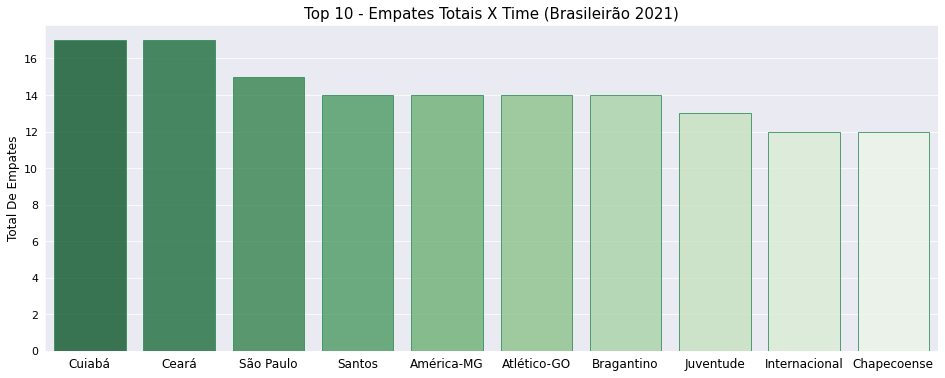

In [45]:
# Gráfico de colunas para representar os dez times que mais empataram no Brasileirão 2021 em ordem decrescente:
ax = sns.barplot(data = df_emp_21.head(10),
                 x = df_emp_21['time'].head(10),
                 y = df_emp_21['total_empates'].head(10),
                 alpha = 0.8,
                 palette = 'Greens_r',
                 edgecolor = 'seagreen')
ax.figure.set_size_inches(16, 6)
ax.set_ylabel('Total De Empates', fontsize = 12, color = 'k')
ax.set_yticklabels(labels = [0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize = 11, color = 'k')
ax.set_xlabel('')
ax.set_xticklabels(labels = ['Cuiabá', 'Ceará', 'São Paulo', 'Santos', 'América-MG', 'Atlético-GO', 
'Bragantino', 'Juventude', 'Internacional', 'Chapecoense'], fontsize = 12, color = 'k')
ax.set_title('Top 10 - Empates Totais X Time (Brasileirão 2021)', fontsize = 15, color = 'k');

### O Atlético Goianiense, o São Paulo e o Bragantino foram os times que mais empataram dentro de casa, em contrapartida o Cuiabá e o Ceará foram os times que mais empataram ao jogarem fora de casa.

### Curiosamente, o São Paulo e o Cuiabá são um dos times com menos vitórias e que não foram rebaixados, enquanto o Grêmio e o Bahia que tiveram mais vitórias foram rebaixados. 

### O gráfico de colunas acima demonstra que o São Paulo e o Cuiabá foram um dos times que mais empataram no Brasileirão 2021 e que contabilizaram mais empates do que o Grêmio e o Bahia. Será que a quantidade de empates do São Paulo e do Cuiabá foram um dos fatores cruciais para que os dois times não fossem rebaixados?   

## (4) - Quais times que mais contabilizaram derrotas em todo o Brasileirão 2021?

In [46]:
# Agrupamento dos times que mais contabilizaram derrotas fora de casa no Brasileirão 2021:
df_br_derr1 = df_br_21[df_br_21['mandante_placar'] > df_br_21['visitante_placar']].groupby('time_visitante'
).agg({'time_visitante': 'size'}).rename(columns = {'time_visitante': 'qtd_derrotas_i'}).reset_index().sort_values('qtd_derrotas_i',
                                                                                                                 ascending = False)
print(df_br_derr1.shape)
df_br_derr1.head()

(20, 2)


,time_visitante,qtd_derrotas_i
13,Gremio,14
7,Chapecoense,12
19,Sport,11
4,Bahia,11
1,Athletico-PR,11


In [47]:
# Agrupamento dos times que mais contabilizaram derrotas dentro de casa no Brasileirão 2021:
df_br_derr2 = df_br_21[df_br_21['visitante_placar'] > df_br_21['mandante_placar']].groupby('time_mandante'
).agg({'time_mandante': 'size'}).rename(columns = {'time_mandante': 'qtd_derrotas_ii'}).reset_index().sort_values('qtd_derrotas_ii',
                                                                                                                 ascending = False)
print(df_br_derr2.shape)
df_br_derr2.head()

(20, 2)


,time_mandante,qtd_derrotas_ii
7,Chapecoense,13
19,Sport,7
9,Cuiaba,6
4,Bahia,6
1,Athletico-PR,6


In [48]:
# Renomeação das colunas dos dois dataframes para facilitar no merge conjuntivo entre os dois dataframes:
df_br_derr1.rename(columns = {'time_visitante': 'time', 'qtd_derrotas_i': 'qtd_derrotas_fora'}, inplace = True)
df_br_derr2.rename(columns = {'time_mandante': 'time', 'qtd_derrotas_ii': 'qtd_derrotas_dentro'}, inplace = True)

In [49]:
# Visualização breve das colunas renomeadas em que a segunda coluna representa a quantidade de derrotas contabilizadas fora de casa:
df_br_derr1.head()

,time,qtd_derrotas_fora
13,Gremio,14
7,Chapecoense,12
19,Sport,11
4,Bahia,11
1,Athletico-PR,11


In [50]:
# Visualização breve das colunas renomeadas em que a segunda coluna representa a quantidade de derrotas contabilizadas dentro de casa:
df_br_derr2.head()

,time,qtd_derrotas_dentro
7,Chapecoense,13
19,Sport,7
9,Cuiaba,6
4,Bahia,6
1,Athletico-PR,6


In [51]:
# Merge entre os dois dataframes para juntar a quantidade de derrotas fora e dentro de casa de cada time em um dataframe:
df_br_derr3 = df_br_derr1.merge(df_br_derr2, how = 'inner', on = 'time')
print(df_br_derr3.shape)
df_br_derr3.head()

(20, 3)


,time,qtd_derrotas_fora,qtd_derrotas_dentro
0,Gremio,14,5
1,Chapecoense,12,13
2,Sport,11,7
3,Bahia,11,6
4,Athletico-PR,11,6


In [52]:
# Criação de uma nova coluna com a quantidade total de derrotas de cada time:
df_br_derr3['total_derrotas'] = df_br_derr3['qtd_derrotas_fora'] + df_br_derr3['qtd_derrotas_dentro'] 

In [53]:
# Ordenação da quantidade total de derrotas em ordem decrescente:
df_br_derr3.sort_values(by = 'total_derrotas', ascending = False, inplace = True)
df_br_derr3[['time', 'total_derrotas']]

,time,total_derrotas
1,Chapecoense,25
0,Gremio,19
2,Sport,18
3,Bahia,17
4,Athletico-PR,17
5,Fluminense,14
6,Juventude,14
7,Fortaleza,14
8,Internacional,14
9,Sao Paulo,12


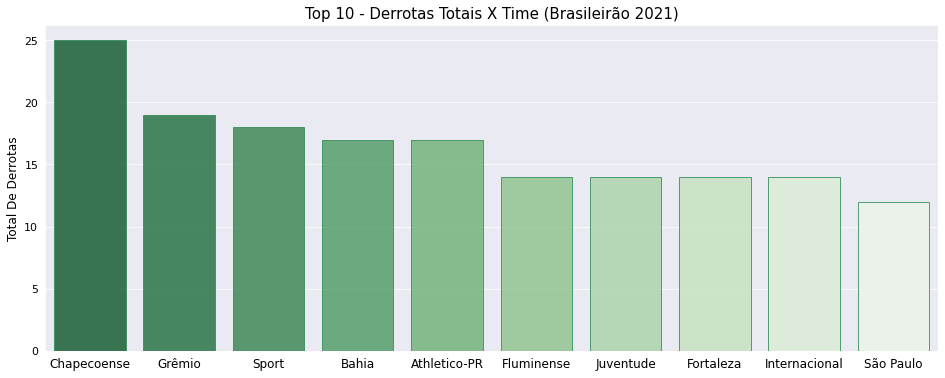

In [54]:
# Gráfico de colunas para representar os dez times que mais perderam no Brasileirão 2021 em ordem decrescente: 
ax = sns.barplot(data = df_br_derr3.head(10), 
                 x = 'time', 
                 y = 'total_derrotas',
                 alpha = 0.8,
                 palette = 'Greens_r',
                 edgecolor = 'seagreen')
ax.figure.set_size_inches(16, 6)
ax.set_xticklabels(['Chapecoense', 'Grêmio','Sport','Bahia','Athletico-PR','Fluminense','Juventude','Fortaleza', 'Internacional', 'São Paulo'],
                   fontsize = 12, color = 'k')
ax.set_xlabel('')
ax.set_yticklabels([0, 5, 10, 15, 20, 25], fontsize = 11, color = 'k')
ax.set_ylabel('Total De Derrotas', fontsize = 12, color = 'k')
ax.set_title('Top 10 - Derrotas Totais X Time (Brasileirão 2021)', fontsize = 15, color = 'k');

In [55]:
# Filtragem do total de empates de Cuiabá, São Paulo, Grêmio e Bahia:
df_emp_21.loc[df_emp_21.time.isin(['Cuiaba', 'Sao Paulo', 'Gremio', 'Bahia']), ['time', 'total_empates']]

,time,total_empates
10,Cuiaba,17
1,Sao Paulo,15
15,Bahia,10
5,Gremio,7


In [56]:
# Diferença de empates entre São Paulo e Grêmio, e entre Cuiabá e Bahia:
# Investigação analítica do porquê São Paulo e Cuiabá que tiveram menos vitórias não foram rebaixados
#, enquanto Cuiabá e Bahia que tiveram mais vitórias, foram rebaixados:
print('A diferença de empates entre São Paulo e Grêmio: ', df_emp_21.total_empates[1] - df_emp_21.total_empates[5], 'empates')
print('\n')
print('A diferença de empates entre Cuiabá e Bahia: ', df_emp_21.total_empates[10] - df_emp_21.total_empates[15], 'empates')

A diferença de empates entre São Paulo e Grêmio:  8 empates


A diferença de empates entre Cuiabá e Bahia:  7 empates


In [57]:
# Quantidade de vitórias dos quatro times no Brasileirão 2021:
df_br_21[df_br_21.vencedor.isin(['Bahia', 'Gremio', 'Sao Paulo', 'Cuiaba'])].vencedor.value_counts()

Gremio       12
Bahia        11
Sao Paulo    11
Cuiaba       10
Name: vencedor, dtype: int64

In [58]:
print('A diferença de vitórias entre Grêmio e Cuiabá: ', 12 - 10, 'vitórias')
print('\n')
print('A diferença de vitórias entre Bahia e Cuiabá: ', 11 - 10, 'vitória')
print('\n')
print('A diferença de vitórias entre Grêmio e São Paulo: ', 12 - 11, 'vitória')

A diferença de vitórias entre Grêmio e Cuiabá:  2 vitórias


A diferença de vitórias entre Bahia e Cuiabá:  1 vitória


A diferença de vitórias entre Grêmio e São Paulo:  1 vitória


### Correspondente às expectativas, Chapecoense, Grêmio, Sport e Bahia que foram os times rebaixados para a série B do Brasileirão, também foram os times com mais derrotas contabilizadas no Brasileirão 2021 como um todo.

### Logo, a justificativa do porquê o São Paulo e o Cuiabá que tiveram menos vitórias não foram rebaixados, em comparação ao Grêmio e ao Bahia que tiveram mais vitórias e foram rebaixados, é que (1) o São Paulo e o Cuiabá contabilizaram mais empates no campeonato e isto os garantem um ponto em cada empate, (2) o Grêmio e o Sport contabilizaram mais derrotas no campeonato e isto não os garantem nenhum ponto e (3) a diferença de vitórias entre Grêmio e Bahia em relação ao São Paulo e Cuiabá é de uma à duas vitórias, enquanto a diferença de empates entre São Paulo e Cuiabá em relação ao Grêmio e ao Bahia é de aproximadamente 7 à 8 empates:



### Cuiabá -> 8 pontos. Bahia -> 3 pontos

### São Paulo -> 7 pontos. Grêmio -> 3 pontos 

### Cuiabá -> 8 pontos. Grêmio -> 6 pontos.


### Resumidamente, São Paulo e Cuiabá por terem contabilizado de 7 à 8 empates do que o Bahia e o Grêmio, conseguiram ultrapassar os pontos de vantagem de uma à duas vitórias do Bahia e do Grêmio, e justificadamente conseguiram evitar o rebaixamento para a série B. 

## (5) - Qual é a correlação de gols dos times mandantes e visitantes em relação aos gols por partida? Ou seja, qual dessas duas variáveis (a) mandante ou (b) visitante é mais influenciável nos gols da partida?

In [59]:
# Correlação entre os gols dos times mandantes em relação aos gols por partida:
(df_br_21['mandante_placar'].corr(other = df_br_21['gols_na_partida'])).round(2)

0.75

In [60]:
# Correlação entre os gols dos times visitantes em relação aos gols por partida:
(df_br_21['visitante_placar'].corr(other = df_br_21['gols_na_partida'])).round(2)

0.69

In [61]:
# Verificação da correlação positiva exclusivamente entre às colunas dos gols dos mandantes e visitantes em relação
# aos gols por partida:
df_br_21[['mandante_placar', 'visitante_placar', 'gols_na_partida']].corr()

,mandante_placar,visitante_placar,gols_na_partida
mandante_placar,1.000000,0.046155,0.750753
visitante_placar,0.046155,1.000000,0.694530
gols_na_partida,0.750753,0.694530,1.000000


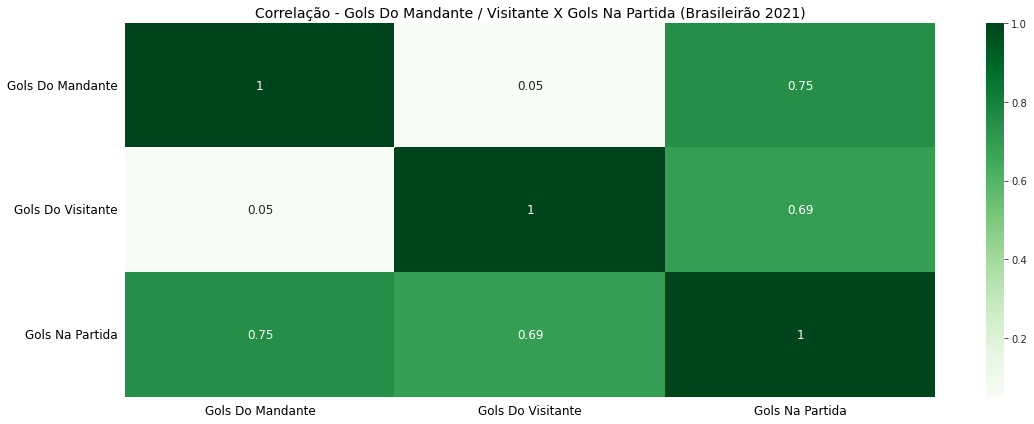

In [62]:
# Gráfico de heatmap para clarificar visualmente o quão os gols dos mandantes e visitantes são 
# correlacionados aos gols por partida:
ax = sns.heatmap(data = df_br_21[['mandante_placar', 'visitante_placar', 'gols_na_partida']].corr().round(2),
                 cmap = 'Greens',
                 xticklabels = ['Gols Do Mandante', 'Gols Do Visitante', 'Gols Na Partida'],
                 yticklabels = ['Gols Do Mandante', 'Gols Do Visitante', 'Gols Na Partida'], edgecolor = 'seagreen',
                 annot = True, annot_kws = {'fontsize': 12})
ax.figure.set_size_inches(16, 6)
plt.xticks(color = 'k', fontsize = 12)
plt.yticks(color = 'k', fontsize = 12)
ax.set_title('Correlação - Gols Do Mandante / Visitante X Gols Na Partida (Brasileirão 2021)', fontsize = 14, color = 'k')
plt.tight_layout();

### As conclusões inferíveis dos gráficos de dispersão e de heatmap expostos acima são:
  
  #### (1) Em conformidade com às expectativas, a correlação entre gols do mandante ou visitante em relação aos gols da partida apresenta uma correlação positiva, ou seja, o aumento de gols do mandante ou visitante é tautologicamente influenciável no aumento de gols da partida.
  #### (2) Como foi especulado de antemão, a correlação entre gols do time mandante e gols da partida apresenta uma correlação minimamente mais forte do que a correlação entre gols do time visitante e gols da partida, assim, confirma a hipótese de que os times da "casa" tendem à ter mais vantagem no jogo do que os times visitantes, e por conseguinte tendem à fazer mais gols do que os times visitantes. 

In [63]:
# Formatação textual de 'Sabado' para 'Sábado': 
df_br_21.dia = df_br_21.dia.replace('Sabado', 'Sábado')
df_br_21.dia.unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['Sábado', 'Domingo', 'Quinta-feira', 'Quarta-feira', 'Terça-feira',
       'Segunda-feira', 'Sexta-feira'], dtype=object)

In [64]:
# Formatação textual da coluna 'Dia' em formato de título:
df_br_21.dia = df_br_21.dia.str.title()
df_br_21.dia.unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['Sábado', 'Domingo', 'Quinta-Feira', 'Quarta-Feira', 'Terça-Feira',
       'Segunda-Feira', 'Sexta-Feira'], dtype=object)

In [65]:
# Análise dos valores únicos que estão escritos incorretamente:
df_br_21.time_mandante.unique()

array(['Cuiaba', 'Bahia', 'Sao Paulo', 'Atletico-MG', 'Flamengo', 'Ceara',
       'Corinthians', 'Chapecoense', 'Athletico-PR', 'Internacional',
       'Atletico-GO', 'Santos', 'Bragantino', 'Fluminense', 'America-MG',
       'Fortaleza', 'Juventude', 'Palmeiras', 'Sport', 'Gremio'],
      dtype=object)

In [66]:
# Correção dos times que estão escritos erroneamente:
df_br_21.time_mandante = df_br_21.time_mandante.replace({'Sao Paulo':'São Paulo',
                                'Atletico-MG': 'Atlético-MG',
                                'Atletico-GO': 'Atlético-GO',
                                'America-MG': 'América-MG',
                                'Gremio': 'Grêmio',
                                'Ceara': 'Ceará'})
df_br_21.time_mandante.unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['Cuiaba', 'Bahia', 'São Paulo', 'Atlético-MG', 'Flamengo', 'Ceará',
       'Corinthians', 'Chapecoense', 'Athletico-PR', 'Internacional',
       'Atlético-GO', 'Santos', 'Bragantino', 'Fluminense', 'América-MG',
       'Fortaleza', 'Juventude', 'Palmeiras', 'Sport', 'Grêmio'],
      dtype=object)

In [67]:
# Mesma correção sobre os times visitantes que estão escritos incorretamente:
df_br_21.time_visitante = df_br_21.time_visitante.replace({'Sao Paulo':'São Paulo',
                                'Atletico-MG': 'Atlético-MG',
                                'Atletico-GO': 'Atlético-GO',
                                'America-MG': 'América-MG',
                                'Gremio': 'Grêmio',
                                'Ceara': 'Ceará'})
df_br_21.time_visitante.unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['Juventude', 'Santos', 'Fluminense', 'Fortaleza', 'Palmeiras',
       'Grêmio', 'Atlético-GO', 'Bragantino', 'América-MG', 'Sport',
       'São Paulo', 'Ceará', 'Bahia', 'Cuiaba', 'Corinthians',
       'Internacional', 'Athletico-PR', 'Chapecoense', 'Atlético-MG',
       'Flamengo'], dtype=object)

In [68]:
# Análise dos valores únicos da coluna 'Arena' que estão escritos incorretamente:
df_br_21.arena.unique()

array(['Arena Pantanal', 'Estadio De Pituacu', 'Morumbi', 'Mineirao',
       'Maracana', 'Arena Castelao', 'Neo Quimica Arena', 'Arena Conda',
       'Estadio Joaquim Americo Guimaraes', 'Estadio Jose Pinheiro Borda',
       'Estadio Antonio Accioly', 'Estadio Urbano Caldeira', 'Nabizao',
       'Estadio Vasco Da Gama', 'Estadio Raimundo Sampaio',
       'Alfredo Jaconi', 'Allianz Parque', 'Adelmar Da Costa Carvalho',
       'Arena Do Gremio', 'Estadio Municipal General Raulino De Oliveira',
       'Estadio Do Governo Do Estado De Goias Serra Dourada',
       'Itaipava Arena Fonte Nova', 'Arena De Pernambuco',
       'Arena Barueri'], dtype=object)

In [69]:
# Correção ortográfica dos nomes de arenas que estão escritas incorretamente:
df_br_21.arena = df_br_21.arena.replace({'Estadio De Pituacu': 'Estádio De Pituaçu',
                         'Mineirao': 'Mineirão',
                         'Arena Castelao': 'Arena Castelão',
                         'Maracana': 'Maracanã',
                        'Neo Quimica Arena': 'Neo Química Arena',
                         'Estadio Joaquim Americo Guimaraes': 'Estádio Joaquim Américo Guimarães',
                         'Estadio Jose Pinheiro Borda': 'Estádio José Pinheiro Borda',
                         'Estadio Antonio Accioly': 'Estádio Antônio Accioly',
                        'Estadio Urbano Caldeira': 'Estádio Urbano Caldeira',
                        'Nabizao': 'Nabizão', 'Estadio Vasco Da Gama': 'Estádio Vasco Da Gama',
                        'Estadio Raimundo Sampaio': 'Estádio Raimundo Sampaio',
                       'Arena Do Gremio': 'Arena Do Grêmio',  'Estadio Municipal General Raulino De Oliveira':
                        'Estádio Municipal General Raulino De Oliveira',
                'Estadio Do Governo Do Estado De Goias Serra Dourada': 'Estádio Do Governo Do Estado De Goiás Serra Dourada',
                })
df_br_21.arena.unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['Arena Pantanal', 'Estádio De Pituaçu', 'Morumbi', 'Mineirão',
       'Maracanã', 'Arena Castelão', 'Neo Química Arena', 'Arena Conda',
       'Estádio Joaquim Américo Guimarães', 'Estádio José Pinheiro Borda',
       'Estádio Antônio Accioly', 'Estádio Urbano Caldeira', 'Nabizão',
       'Estádio Vasco Da Gama', 'Estádio Raimundo Sampaio',
       'Alfredo Jaconi', 'Allianz Parque', 'Adelmar Da Costa Carvalho',
       'Arena Do Grêmio', 'Estádio Municipal General Raulino De Oliveira',
       'Estádio Do Governo Do Estado De Goiás Serra Dourada',
       'Itaipava Arena Fonte Nova', 'Arena De Pernambuco',
       'Arena Barueri'], dtype=object)

In [70]:
# Cópia do dataframe do Brasileirão 2021 atribuído à uma nova variável:
df_br_21_copy = df_br_21.copy()
print(df_br_21_copy.shape)
df_br_21_copy.head()

(380, 19)


,ID,rodada,data,hora,dia,time_mandante,time_visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor,gols_na_partida
7265,7266,1,2021-05-29,19:00,Sábado,Cuiaba,Juventude,4-3-3,4-2-3-1,E. de Barros,E. de Barros,-,Arena Pantanal,2,2,MT,RS,-,4
7266,7267,1,2021-05-29,20:00,Sábado,Bahia,Santos,4-3-3,4-3-3,F. Diniz Silva,F. Diniz Silva,Bahia,Estádio De Pituaçu,3,0,BA,SP,BA,3
7267,7268,1,2021-05-29,21:00,Sábado,São Paulo,Fluminense,3-5-2,4-2-3-1,R. Machado Marques,R. Machado Marques,-,Morumbi,0,0,SP,RJ,-,0
7268,7269,1,2021-05-30,11:01,Domingo,Atlético-MG,Fortaleza,4-2-3-1,3-5-2,J. Vojvoda,J. Vojvoda,Fortaleza,Mineirão,1,2,MG,CE,CE,3
7269,7270,1,2021-05-30,16:00,Domingo,Flamengo,Palmeiras,4-2-3-1,3-5-2,A. Moreira Ferreira,A. Moreira Ferreira,Flamengo,Maracanã,1,0,RJ,SP,RJ,1


In [71]:
# Renomeação da coluna de 'partida_id' para 'ID' com o próposito de utilizarmos essa coluna como chave para fazermos o merge 
# entre os dois dataframes:
df_br_est_21.rename(columns = {'partida_id': 'ID'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
# Merge entre o dataframe de jogos do Brasileirão 2021 com às estatísticas de jogos times mandantes:
df_br_21_man = df_br_21.merge(df_br_est_21.loc[14530::2], how = 'inner', on = 'ID').drop(columns = 'rodada_y').rename(columns = {'rodada_x': 'rodada'} )
print(df_br_21_man.shape)
df_br_21_man.head()

(380, 30)


,ID,rodada,data,hora,dia,time_mandante,time_visitante,formacao_mandante,formacao_visitante,tecnico_mandante,...,chutes,chutes_no_alvo,%_posse_de_bola,passes,%_precisão_de_passe,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,7266,1,2021-05-29,19:00,Sábado,Cuiaba,Juventude,4-3-3,4-2-3-1,E. de Barros,...,14,2,60.0,490,85.0,14,1,0,0,9
1,7267,1,2021-05-29,20:00,Sábado,Bahia,Santos,4-3-3,4-3-3,F. Diniz Silva,...,5,3,34.0,304,75.0,18,3,0,2,4
2,7268,1,2021-05-29,21:00,Sábado,São Paulo,Fluminense,3-5-2,4-2-3-1,R. Machado Marques,...,7,3,72.0,636,87.0,10,1,0,2,4
3,7269,1,2021-05-30,11:01,Domingo,Atlético-MG,Fortaleza,4-2-3-1,3-5-2,J. Vojvoda,...,13,4,55.0,398,81.0,16,2,0,2,5
4,7270,1,2021-05-30,16:00,Domingo,Flamengo,Palmeiras,4-2-3-1,3-5-2,A. Moreira Ferreira,...,14,10,62.0,503,87.0,25,2,0,0,3


In [73]:
# Merge entre o dataframe de jogos do Brasileirão 2021 com às estatísticas de jogos times visitantes:
df_br_21_vis = df_br_21_copy.merge(df_br_est_21.loc[14531::2], how = 'inner', on = 'ID').drop(columns = 'rodada_y').rename(columns = {'rodada_x': 'rodada'})
print(df_br_21_vis.shape)
df_br_21_vis.head()

(380, 30)


,ID,rodada,data,hora,dia,time_mandante,time_visitante,formacao_mandante,formacao_visitante,tecnico_mandante,...,chutes,chutes_no_alvo,%_posse_de_bola,passes,%_precisão_de_passe,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,7266,1,2021-05-29,19:00,Sábado,Cuiaba,Juventude,4-3-3,4-2-3-1,E. de Barros,...,7,3,40.0,342,77.0,14,3,0,1,1
1,7267,1,2021-05-29,20:00,Sábado,Bahia,Santos,4-3-3,4-3-3,F. Diniz Silva,...,12,4,66.0,563,88.0,9,3,0,2,11
2,7268,1,2021-05-29,21:00,Sábado,São Paulo,Fluminense,3-5-2,4-2-3-1,R. Machado Marques,...,11,5,28.0,251,70.0,12,2,0,2,5
3,7269,1,2021-05-30,11:01,Domingo,Atlético-MG,Fortaleza,4-2-3-1,3-5-2,J. Vojvoda,...,18,5,45.0,329,82.0,19,4,0,3,4
4,7270,1,2021-05-30,16:00,Domingo,Flamengo,Palmeiras,4-2-3-1,3-5-2,A. Moreira Ferreira,...,12,5,38.0,300,81.0,21,3,0,3,4


In [74]:
# Verificação do tipo de dados das colunas do primeiro dataframe de times mandantes:
df_br_21_man.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   380 non-null    int64         
 1   rodada               380 non-null    int64         
 2   data                 380 non-null    datetime64[ns]
 3   hora                 380 non-null    object        
 4   dia                  380 non-null    object        
 5   time_mandante        380 non-null    object        
 6   time_visitante       380 non-null    object        
 7   formacao_mandante    380 non-null    object        
 8   formacao_visitante   380 non-null    object        
 9   tecnico_mandante     380 non-null    object        
 10  tecnico_visitante    380 non-null    object        
 11  vencedor             380 non-null    object        
 12  arena                380 non-null    object        
 13  mandante_placar      380 non-null  

In [75]:
# Verificação de tipo de dados das colunas no segunda dataframe de times visitantes:
df_br_21_vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   380 non-null    int64         
 1   rodada               380 non-null    int64         
 2   data                 380 non-null    datetime64[ns]
 3   hora                 380 non-null    object        
 4   dia                  380 non-null    object        
 5   time_mandante        380 non-null    object        
 6   time_visitante       380 non-null    object        
 7   formacao_mandante    380 non-null    object        
 8   formacao_visitante   380 non-null    object        
 9   tecnico_mandante     380 non-null    object        
 10  tecnico_visitante    380 non-null    object        
 11  vencedor             380 non-null    object        
 12  arena                380 non-null    object        
 13  mandante_placar      380 non-null  

In [76]:
# Renomeação da coluna 'chutes_no_alvo' para 'chutes_ao_gol', simplesmente para a coluna ter um nome mais intutivo e entendível:
df_br_21_man.rename(columns = {'chutes_no_alvo': 'chutes_ao_gol'}, inplace = True)
df_br_21_vis.rename(columns = {'chutes_no_alvo': 'chutes_ao_gol'}, inplace = True)

## (6) - Qual é a correlação entre os gols dos times mandantes ou visitantes em relação ao total de gols no Brasileirão 2021?

In [77]:
# Agrupamento da quantidade de chutes ao gol de cada time mandante no campeonato brasileiro:
df_br_21_chutes = df_br_21_man.groupby('time_mandante').agg({'chutes_ao_gol': 'sum'}).sort_values('chutes_ao_gol', ascending = False)
print(df_br_21_chutes.shape)
df_br_21_chutes.head()

(20, 1)


,chutes_ao_gol
time_mandante,
Flamengo,113
Palmeiras,100
Atlético-MG,99
Grêmio,99
Internacional,96


In [78]:
# Correlação entre os gols do time mandante e os chutes ao gol do time mandante:
df_br_21_man['mandante_placar'].corr(df_br_21_man['chutes_ao_gol'])

0.4571316355705401

In [79]:
# Agrupamento da quantidade de chutes ao gol dos times visitantes ao decorrer do Brasileirão 2021:
df_br_21_chutes_2 = df_br_21_vis.groupby('time_visitante').agg({'chutes_ao_gol': 'sum'}).sort_values('chutes_ao_gol', ascending = False)
print(df_br_21_chutes_2.shape)
df_br_21_chutes_2.head()

(20, 1)


,chutes_ao_gol
time_visitante,
Flamengo,117
Bragantino,93
Fortaleza,87
Atlético-MG,86
Palmeiras,84


In [80]:
# Correlação entre gols do time visitante e os chuter ao gol na partida:
df_br_21_vis['visitante_placar'].corr(df_br_21_vis['chutes_ao_gol'])

0.5065286033449853

In [81]:
# Resetação de times mandantes e visitantes do índice:
df_br_21_chutes.reset_index(inplace = True)
df_br_21_chutes_2.reset_index(inplace = True)

In [82]:
# Renomeação das colunas para facilitar na realização do merge entre ambos dataframes:
df_br_21_chutes.rename(columns = {'time_mandante': 'time',
                                  'chutes_ao_gol': 'chutes_ao_gol_man'}, inplace = True)
df_br_21_chutes_2.rename(columns = {'time_visitante': 'time',
                                                                'chutes_ao_gol': 'chutes_ao_gol_vis'}, inplace = True)

In [83]:
# A quantidade de chutes ao gol de cada time como mandante e visitante de todos os jogos do Brasileirão 2021:
# Merge entre os dois dataframes de chutes ao gol de cada time em jogos dentro ou fora de casa:
df_br_21_chutes_3 = df_br_21_chutes.merge(df_br_21_chutes_2, how = 'inner', on = 'time')
print(df_br_21_chutes_3.shape)
df_br_21_chutes_3.head()

(20, 3)


,time,chutes_ao_gol_man,chutes_ao_gol_vis
0,Flamengo,113,117
1,Palmeiras,100,84
2,Atlético-MG,99,86
3,Grêmio,99,80
4,Internacional,96,75


In [84]:
# Criação de uma coluna com o total de chutes ao gol no Brasileirão 2021 de cada time:
df_br_21_chutes_3 = df_br_21_chutes_3.assign(
    total_chutes_ao_gol = df_br_21_chutes_3['chutes_ao_gol_man'] + df_br_21_chutes_3['chutes_ao_gol_vis'])
df_br_21_chutes_3.head()

,time,chutes_ao_gol_man,chutes_ao_gol_vis,total_chutes_ao_gol
0,Flamengo,113,117,230
1,Palmeiras,100,84,184
2,Atlético-MG,99,86,185
3,Grêmio,99,80,179
4,Internacional,96,75,171


In [85]:
# Quantidade de gols dos times mandantes em todo o Brasileirão 2021:
df_gols_21_man = df_br_21.groupby('time_mandante'
).agg({'mandante_placar': 'sum'}).reset_index().sort_values('mandante_placar', ascending = False).rename(columns = {
    'time_mandante': 'time',
    'mandante_placar':'gols_mandante'
})
print(df_gols_21_man.shape)
df_gols_21_man.head()

(20, 2)


,time,gols_mandante
3,Atlético-MG,42
16,Palmeiras,33
10,Flamengo,31
14,Internacional,29
13,Grêmio,29


In [86]:
# Quantidade de gols dos times visitantes em todo o Brasileirão 2021:
df_gols_21_vis = df_br_21.groupby('time_visitante'
).agg({'visitante_placar': 'sum'}).reset_index().sort_values('visitante_placar', ascending = False).rename(columns = {
    'time_visitante': 'time',
    'visitante_placar': 'gols_visitante'
})
print(df_gols_21_vis.shape)
df_gols_21_vis.head()

(20, 2)


,time,gols_visitante
10,Flamengo,38
5,Bragantino,27
16,Palmeiras,25
3,Atlético-MG,25
0,América-MG,19


In [87]:
# QUantidade de gols de cada time como mandante e visitante:
df_gols_21_br = df_gols_21_man.merge(df_gols_21_vis, how = 'inner', on = 'time')
print(df_gols_21_br.shape)
df_gols_21_br.head()

(20, 3)


,time,gols_mandante,gols_visitante
0,Atlético-MG,42,25
1,Palmeiras,33,25
2,Flamengo,31,38
3,Internacional,29,15
4,Grêmio,29,15


In [88]:
# Criação de coluna do total de gols de cada time no Brasileirão 2021:
df_gols_21_br = df_gols_21_br.assign(total_gols = df_gols_21_br.gols_mandante + df_gols_21_br.gols_visitante)
df_gols_21_br.sort_values('total_gols', ascending = False, inplace = True)
df_gols_21_br.head()

,time,gols_mandante,gols_visitante,total_gols
2,Flamengo,31,38,69
0,Atlético-MG,42,25,67
1,Palmeiras,33,25,58
5,Bragantino,28,27,55
3,Internacional,29,15,44


In [89]:
# Criação de coluna do percentual de gols de cada time no campeonato brasileiro como um todo:
df_gols_21_br['%_de_gols'] = (df_gols_21_br.total_gols / df_gols_21_br.total_gols.cumsum()[19] * 100).round(2)
df_gols_21_br.head()

,time,gols_mandante,gols_visitante,total_gols,%_de_gols
2,Flamengo,31,38,69,8.19
0,Atlético-MG,42,25,67,7.96
1,Palmeiras,33,25,58,6.89
5,Bragantino,28,27,55,6.53
3,Internacional,29,15,44,5.23


In [90]:
# Criação de coluna do percentual de chutes ao gol por cada time no Brasileirão 2021:
df_br_21_chutes_3['%_chutes_ao_gol'] = (
    df_br_21_chutes_3.total_chutes_ao_gol / df_br_21_chutes_3.total_chutes_ao_gol.cumsum()[19] * 100).round(2)
df_br_21_chutes_3.head()

,time,chutes_ao_gol_man,chutes_ao_gol_vis,total_chutes_ao_gol,%_chutes_ao_gol
0,Flamengo,113,117,230,7.32
1,Palmeiras,100,84,184,5.85
2,Atlético-MG,99,86,185,5.89
3,Grêmio,99,80,179,5.70
4,Internacional,96,75,171,5.44


In [91]:
# Merge entre os gols e os chutes ao gol de cada time no campeonato:
df_gols_chutes_21 = df_gols_21_br.merge(df_br_21_chutes_3, how = 'inner', on = 'time')
print(df_gols_chutes_21.shape)
df_gols_chutes_21.head()

(20, 9)


,time,gols_mandante,gols_visitante,total_gols,%_de_gols,chutes_ao_gol_man,chutes_ao_gol_vis,total_chutes_ao_gol,%_chutes_ao_gol
0,Flamengo,31,38,69,8.19,113,117,230,7.32
1,Atlético-MG,42,25,67,7.96,99,86,185,5.89
2,Palmeiras,33,25,58,6.89,100,84,184,5.85
3,Bragantino,28,27,55,6.53,71,93,164,5.22
4,Internacional,29,15,44,5.23,96,75,171,5.44


In [92]:
# Correlação entre os gols de cada time (mandante/visitante) e os chutes ao gol de cada time (mandante/visitante):
df_gols_chutes_21[['gols_mandante', 'gols_visitante',
                   'total_gols', 'chutes_ao_gol_man',
                   'chutes_ao_gol_vis', 'total_chutes_ao_gol']].corr()

,gols_mandante,gols_visitante,total_gols,chutes_ao_gol_man,chutes_ao_gol_vis,total_chutes_ao_gol
gols_mandante,1.000000,0.602866,0.906404,0.718876,0.665407,0.750706
gols_visitante,0.602866,1.000000,0.883459,0.480820,0.816775,0.733744
total_gols,0.906404,0.883459,1.000000,0.676705,0.823177,0.829306
chutes_ao_gol_man,0.718876,0.480820,0.676705,1.000000,0.674802,0.887980
chutes_ao_gol_vis,0.665407,0.816775,0.823177,0.674802,1.000000,0.938603
total_chutes_ao_gol,0.750706,0.733744,0.829306,0.887980,0.938603,1.000000


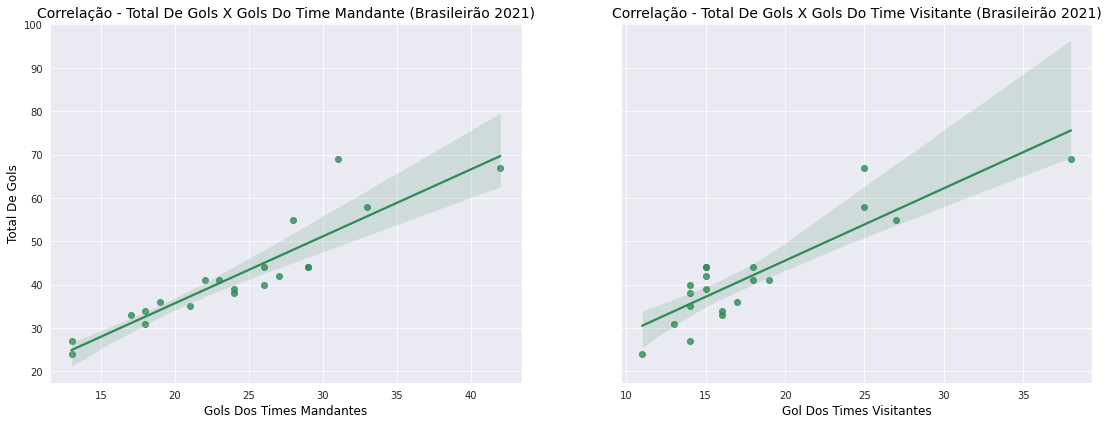

In [93]:
# Gráfico de dispersão para demonstrar visualmente como os gols do time mandante ou visitante são influenciáveis no total de gols:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True)
sns.regplot(ax = ax[0], data = df_gols_chutes_21,
                     y = 'total_gols',
                     x = 'gols_mandante',
color = 'seagreen', scatter_kws = {'edgecolor' : 'seagreen'})
ax[0].figure.set_size_inches(16, 6)
ax[0].set_xlabel('Gols Dos Times Mandantes', fontsize = 12, color = 'k')
ax[0].set_ylabel('Total De Gols', fontsize = 12, color = 'k')
ax[0].set_title('Correlação - Total De Gols X Gols Do Time Mandante (Brasileirão 2021)', fontsize = 14, color = 'k')
sns.regplot(ax = ax[1], data = df_gols_chutes_21,
                     y = 'total_gols',
                     x = 'gols_visitante',
color = 'seagreen', scatter_kws = {'edgecolor': 'seagreen'})
ax[1].figure.set_size_inches(16, 6)
ax[1].set_xlabel('Gol Dos Times Visitantes', fontsize = 12, color = 'k')
ax[1].set_title('Correlação - Total De Gols X Gols Do Time Visitante (Brasileirão 2021)', fontsize = 14, color = 'k')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()

In [94]:
# Correlação específica e demonstrada numericamente entre gols do time mandante ou visitante em relação 
# ao total de gols:
print('Correlação - Gols Do Time Mandante X Total De Gols: ', (df_gols_chutes_21['gols_mandante'].corr(df_gols_chutes_21['total_gols'])).round(2))
print('\n')
print('Correlação - Gols Do Time Visitante X Total De Gols: ', (df_gols_chutes_21['gols_visitante'].corr(df_gols_chutes_21['total_gols']).round(2)))

Correlação - Gols Do Time Mandante X Total De Gols:  0.91


Correlação - Gols Do Time Visitante X Total De Gols:  0.88


### Basicamente, como foi extraído anteriormente a correlação entre gols do time mandante e gols na partida que indica uma correlação infimamente mais forte do que a correlação entre gols do time visitante e gols na partida, neste caso reiteradamente obtivemos uma informação semelhante em que os gols dos times mandantes são positivamente mais correlacionados com o total de gols do que os gols dos times visitantes, porém a diferença de correlação entre tais variáveis é exígua. 

### Resumidamente, a correlação positiva indicável por tais variáveis informa que o aumento no total de gols é mais correlacionado pelo aumento de gols dos times mandantes do que pelo aumento de gols dos times visitantes, porém tal diferença de correlações é insignificantemente mínima.

## (7) - Qual é a correlação entre chutes ao gol e o total de gols de cada time como mandante e visitante?  

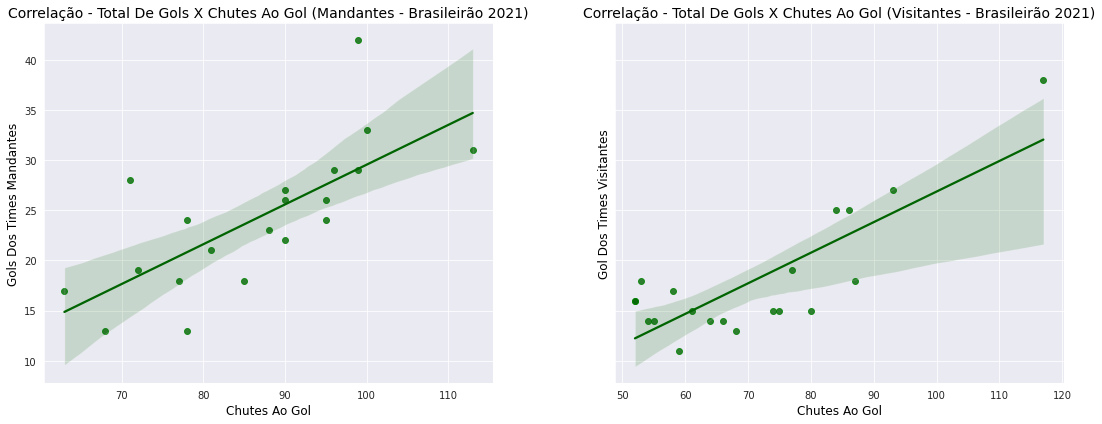

In [95]:
# Gráfico de regressão linear e dispersão para representar a correlação entre chutes ao gol
# e gols na partida de times como mandantes ou visitantes:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True)
sns.regplot(ax = ax[0], data = df_gols_chutes_21,
                     y = 'gols_mandante',
                     x = 'chutes_ao_gol_man',
color = 'darkgreen', scatter_kws = {'edgecolor': 'green'})
ax[0].figure.set_size_inches(16, 6)
ax[0].set_xlabel('Chutes Ao Gol', fontsize = 12, color = 'k')
ax[0].set_ylabel('Gols Dos Times Mandantes', fontsize = 12, color = 'k')
ax[0].set_title('Correlação - Total De Gols X Chutes Ao Gol (Mandantes - Brasileirão 2021)', fontsize = 14, color = 'k')
sns.regplot(ax = ax[1], data = df_gols_chutes_21,
                     y = 'gols_visitante',
                     x = 'chutes_ao_gol_vis',
color = 'darkgreen', scatter_kws = {'edgecolor': 'green'})
ax[1].figure.set_size_inches(16, 6)
ax[1].set_xlabel('Chutes Ao Gol', fontsize = 12, color = 'k')
ax[1].set_title('Correlação - Total De Gols X Chutes Ao Gol (Visitantes - Brasileirão 2021)', fontsize = 14, color = 'k')
ax[1].set_ylabel('Gol Dos Times Visitantes', fontsize = 12, color = 'k')
plt.tight_layout()
plt.show()

In [96]:
# Correlação numérica entre chutes ao gols e gols de cada time como mandante ou visitante:
print('Correlação - Chutes Ao Gol  X Gols Do Time Mandante: ', (df_gols_chutes_21['chutes_ao_gol_man'].corr(df_gols_chutes_21['gols_mandante'])).round(2))
print('\n')
print('Correlação - Chutes Ao Gol X Gols Do Time Visitante: ', (df_gols_chutes_21['chutes_ao_gol_vis'].corr(df_gols_chutes_21['gols_visitante'])).round(2))

Correlação - Chutes Ao Gol  X Gols Do Time Mandante:  0.72


Correlação - Chutes Ao Gol X Gols Do Time Visitante:  0.82


### Interessantemente, a variável de chutes ao gol de times visitantes é positivamente mais correlacionada com os gols dos times visitantes do que é a variável de chutes ao gol de times mandantes com os gols dos times mandantes, isto é, o aumento de chutes ao gol de um time visitante é mais correlacionada com o aumento de gols do time visitante do que o aumento de chutes ao gol de um time mandante é correlacionado com o aumento de gols do time mandante.

### Especulativamente, há como supormos que os chutes ao gol são mais correlacionados ao aumento de gols do time visitante do que ao aumento de gols do time mandante porque os times visitantes por terem menos facilidade e oportunidade para contra-atacar o time adversário, aproveitam às pouquíssimas oportunidades de chute ao gol do time adversário com mais precisão e nos momentos exatos em que a defesa do time adversário está distraída no jogo, e por esse motivo os chutes ao gol do time visitante poderão ser correlativamente influentes (ou não) no aumento de gols do time visitante.

#### Obs - Correlação não é necessariamente causalidade, tal suposição acima é definitivamente especulativa e sem quaisquer provas definitórias.

## (8) - Qual é a correlação entre os escanteios cobrados e os gols marcados por cada time como mandante ou visitante? 

In [97]:
# Agrupamento de escanteios cobrados por cada time como mandante:
df_esc_man_21_br = df_br_21_man.groupby('time_mandante').agg({
    'escanteios': 'sum'
}).reset_index().sort_values('escanteios', ascending = False)
print(df_esc_man_21_br.shape)
df_esc_man_21_br.rename(columns = {'time_mandante': 'time'}, inplace = True)
df_esc_man_21_br.head()

(20, 2)


,time,escanteios
16,Palmeiras,137
10,Flamengo,131
13,Grêmio,130
4,Bahia,125
8,Corinthians,119


In [98]:
# Agrupamento de escanteios cobrados por cada time como visitante:
df_esc_vis_21_br = df_br_21_vis.groupby('time_visitante').agg({
    'escanteios': 'sum'
}).reset_index().sort_values('escanteios', ascending = False)
print(df_esc_vis_21_br.shape)
df_esc_vis_21_br.rename(columns = {'time_visitante': 'time'}, inplace = True)
df_esc_vis_21_br.head()

(20, 2)


,time,escanteios
3,Atlético-MG,127
13,Grêmio,112
10,Flamengo,99
19,São Paulo,95
6,Ceará,90


In [99]:
# Merge entre os escanteios cobrados de cada time como mandante ou visitante:
df_esc_21_br = df_esc_man_21_br.merge(df_esc_vis_21_br, how = 'inner', on = 'time', suffixes = ['_man', '_vis'])
print(df_esc_21_br.shape)
df_esc_21_br.head()

(20, 3)


,time,escanteios_man,escanteios_vis
0,Palmeiras,137,80
1,Flamengo,131,99
2,Grêmio,130,112
3,Bahia,125,82
4,Corinthians,119,88


In [100]:
# Merge entre o dataframe de gols e escanteios de cada time como mandante ou visitante:
df_gols_esc_21_br = df_gols_21_br.merge(df_esc_21_br, how = 'inner', on = 'time')
print(df_gols_esc_21_br.shape)
df_gols_esc_21_br.head()

(20, 7)


,time,gols_mandante,gols_visitante,total_gols,%_de_gols,escanteios_man,escanteios_vis
0,Flamengo,31,38,69,8.19,131,99
1,Atlético-MG,42,25,67,7.96,115,127
2,Palmeiras,33,25,58,6.89,137,80
3,Bragantino,28,27,55,6.53,98,82
4,Internacional,29,15,44,5.23,110,84


In [101]:
# Criação da coluna do total de escanteios cobrados por cada time no Brasileirão 2021:
df_gols_esc_21_br = df_gols_esc_21_br.assign(total_escanteios = df_gols_esc_21_br.escanteios_man + df_gols_esc_21_br.escanteios_vis)
print(df_gols_esc_21_br.shape)
df_gols_esc_21_br.head()

(20, 8)


,time,gols_mandante,gols_visitante,total_gols,%_de_gols,escanteios_man,escanteios_vis,total_escanteios
0,Flamengo,31,38,69,8.19,131,99,230
1,Atlético-MG,42,25,67,7.96,115,127,242
2,Palmeiras,33,25,58,6.89,137,80,217
3,Bragantino,28,27,55,6.53,98,82,180
4,Internacional,29,15,44,5.23,110,84,194


In [102]:
# Criação da coluna da porcentagem de escanteios cobrados por cada time no Brasileirão 2021:
df_gols_esc_21_br = df_gols_esc_21_br.assign(perc_de_escanteios = ((df_gols_esc_21_br.total_escanteios / df_gols_esc_21_br.total_escanteios.cumsum()[19]) * 100).round(2))
df_gols_esc_21_br.rename(columns = {'perc_de_escanteios': '%_de_escanteios'}, inplace = True)
df_gols_esc_21_br.head()

,time,gols_mandante,gols_visitante,total_gols,%_de_gols,escanteios_man,escanteios_vis,total_escanteios,%_de_escanteios
0,Flamengo,31,38,69,8.19,131,99,230,5.93
1,Atlético-MG,42,25,67,7.96,115,127,242,6.24
2,Palmeiras,33,25,58,6.89,137,80,217,5.60
3,Bragantino,28,27,55,6.53,98,82,180,4.64
4,Internacional,29,15,44,5.23,110,84,194,5.00


In [103]:
# Correlação numérica entre os escanteios cobrados e os gols marcados por cada time como mandante:
df_br_21_man.groupby('time_mandante').agg({
    'mandante_placar': 'sum',
    'escanteios': 'sum'
}).corr()

,mandante_placar,escanteios
mandante_placar,1.000000,0.489766
escanteios,0.489766,1.000000


In [104]:
# Correlação numérica entre os escanteios cobrados e os gols marcados por cada time como visitante:
df_br_21_vis.groupby('time_visitante').agg({
    'visitante_placar': 'sum',
    'escanteios': 'sum'
}).corr()

,visitante_placar,escanteios
visitante_placar,1.000000,0.281824
escanteios,0.281824,1.000000


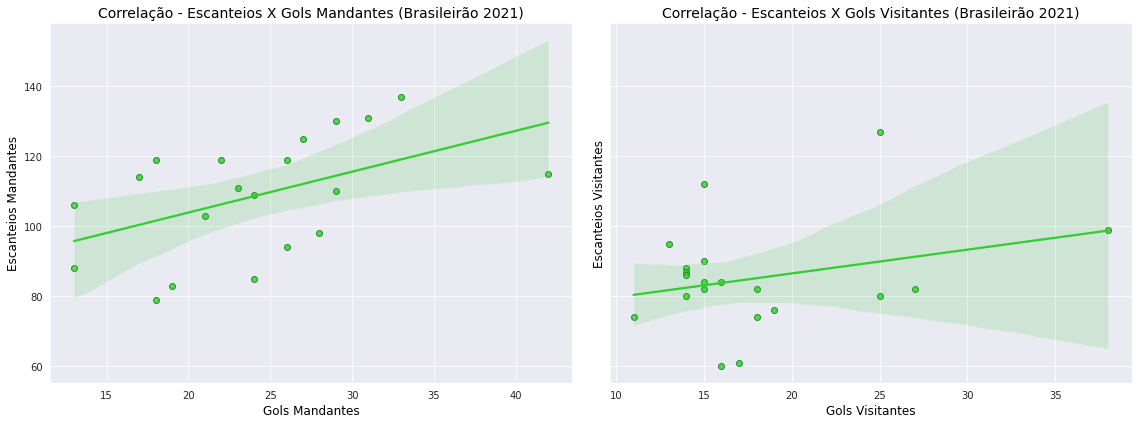

In [105]:
# Gráfico de regressão linear e dispersão para representar a correlação 
# entre os escanteios cobrados e os gols marcados de cada time como mandante ou visitante:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6), sharey = True)
sns.regplot(ax = ax[0], data = df_br_21_man.groupby('time_mandante').agg({
    'mandante_placar': 'sum',
    'escanteios': 'sum'
}), 
               x = 'mandante_placar',
               y = 'escanteios',
            color = 'limegreen', scatter_kws = {'edgecolor': 'g'}
              )
sns.regplot(ax = ax[1], data = df_br_21_vis.groupby('time_visitante').agg({
    'visitante_placar': 'sum',
    'escanteios': 'sum'
}), 
               x = 'visitante_placar',
               y = 'escanteios',
            color = 'limegreen', scatter_kws = {'edgecolor': 'g'}
              )
ax[0].set_ylabel('Escanteios Mandantes', fontsize = 12, color = 'k')
ax[0].set_xlabel('Gols Mandantes', fontsize = 12, color = 'k')
ax[0].set_title('Correlação - Escanteios X Gols Mandantes (Brasileirão 2021)', fontsize = 14, color = 'k')
ax[1].set_ylabel('Escanteios Visitantes', fontsize = 12, color = 'k')
ax[1].set_xlabel('Gols Visitantes', fontsize = 12, color = 'k')
ax[1].set_title('Correlação - Escanteios X Gols Visitantes (Brasileirão 2021)', fontsize = 14, color = 'k')
plt.tight_layout();

In [106]:
print('Correlação - Escanteios X Gols Do Time Mandante: ', (df_br_21_man.groupby('time_mandante').agg({'mandante_placar': 'sum',
                                       'escanteios': 'sum'}).corr().iloc[1][0]).round(2))
print('\n')
print('Correlação - Escanteios X Gols Do Time Visitante: ',  (df_br_21_vis.groupby('time_visitante').agg({'visitante_placar': 'sum',
                                       'escanteios': 'sum'}).corr().iloc[1][0]).round(2))

Correlação - Escanteios X Gols Do Time Mandante:  0.49


Correlação - Escanteios X Gols Do Time Visitante:  0.28


### A correlação entre escanteios cobrados e gols marcados é uma correlação positiva, isto é, o aumento de escanteios cobrados é correlacionado paralelamente com o aumento de gols marcados, porém tal correlação não implica necessariamente que a cobrança de escanteios esteja associada causalmente com o aumento de gols marcados. 

### A correlação entre escanteios cobrados e gols marcados por times mandantes é uma correlação mais forte do que a correlação à times visitantes, isto é, é mais provável com base em tal correlação que o aumento de escanteios cobrados seja mais influente no aumento de gols marcados para times mandantes do que para visitantes. 

### Não obstante, a correlação entre escanteios cobrados e gols marcados por times mandantes é uma correlação moderada de 0.49, e a correlação entre escanteios cobrados e gols marcados por times visitantes é uma correlação fraca de 0.28.

## (9) - Quais são os principais fatores estatísticos que fizeram com que os times do G4 se destacassem no Brasileirão 2021?

In [107]:
# Correção ortográfica do nome dos times vencedores de cada partida:
df_br_21_man.vencedor = df_br_21_man.vencedor.replace({'Ceara': 'Ceará',
                               'Gremio': 'Grêmio',
                               'America-MG': 'América-MG',
                               'Cuiaba': 'Cuiabá',
                               'Atletico-GO' : 'Atlético-GO',
                               'Atletico-MG': 'Atlético-MG',
                               'Sao Paulo': 'São Paulo'})

df_br_21_vis.vencedor = df_br_21_vis.vencedor.replace({'Ceara': 'Ceará',
                               'Gremio': 'Grêmio',
                               'America-MG': 'América-MG',
                               'Cuiaba': 'Cuiabá',
                               'Atletico-GO' : 'Atlético-GO',
                               'Atletico-MG': 'Atlético-MG',
                               'Sao Paulo': 'São Paulo'})

In [108]:
# Os times vencedores com mais chutes ao gol são os times com mais gols marcados em jogos dentro de casa:
df_br_21_man.query('mandante_placar > visitante_placar'
).groupby('vencedor').agg({'chutes_ao_gol': ['sum', 'mean'],
                           'mandante_placar': ['sum', 'mean']}).reset_index().drop([0], axis = 0
).sort_values([('chutes_ao_gol', 'sum'), ('mandante_placar', 'sum')], ascending = False).head(5)

vencedor chutes_ao_gol           mandante_placar          
                          sum      mean             sum      mean
3   Atlético-MG            93  5.470588              40  2.352941
9      Flamengo            84  6.461538              29  2.230769
11    Fortaleza            66  6.000000              23  2.090909
15    Palmeiras            63  5.727273              24  2.181818
7   Corinthians            52  5.200000              19  1.900000

In [109]:
# Novamente, os times vencedores com mais chutes ao gol são os times com mais gols marcados em jogos fora de casa:
df_br_21_vis.query('visitante_placar > mandante_placar'
).groupby('vencedor').agg({'chutes_ao_gol': ['sum', 'mean'],'visitante_placar': ['sum', 'mean']}
                          ).reset_index().sort_values([('chutes_ao_gol', 'sum'), ('visitante_placar', 'sum')], ascending = False).head(5)

vencedor chutes_ao_gol           visitante_placar          
                          sum      mean              sum      mean
10     Flamengo            58  7.250000               26  3.250000
16    Palmeiras            50  5.555556               21  2.333333
5    Bragantino            36  5.142857               17  2.428571
3   Atlético-MG            36  4.000000               14  1.555556
12    Fortaleza            31  5.166667               11  1.833333

In [110]:
# Correlação altamente forte entre chutes ao gol e gols dos times vencedores como mandantes ou visitantes:
print('Correlação - Chutes No Gol X Vencedores Mandantes: ', (df_br_21_man.query('mandante_placar > visitante_placar'
).groupby('vencedor').agg({'chutes_ao_gol': ['sum', 'mean'],
                           'mandante_placar': ['sum', 'mean']}).reset_index().drop([0], axis = 0
).sort_values(('chutes_ao_gol', 'mean'), ascending = False).corr().iloc[0][2]).round(2))
print('\n')
print('Correlação - Chutes No Gol X Vencedores Visitantes: ', (df_br_21_vis.query('visitante_placar > mandante_placar'
).groupby('vencedor').agg({'chutes_ao_gol': ['sum', 'mean'],'visitante_placar': ['sum', 'mean']}
                          ).reset_index().sort_values([('chutes_ao_gol', 'sum'), ('visitante_placar', 'sum')], ascending = False).corr().iloc[0][2]).round(2))



Correlação - Chutes No Gol X Vencedores Mandantes:  0.95


Correlação - Chutes No Gol X Vencedores Visitantes:  0.97


In [111]:
# Agrupamento dos times mandantes vencedores para sabermos a quantidade de gols marcados 
# e escanteios cobrados dos times vitoriosos das partidas:
df_br_21_man.query('mandante_placar > visitante_placar').groupby('vencedor').agg({'mandante_placar': ['sum', 'mean'],
                                                                                  'escanteios': ['sum', 'mean']}).reset_index(
                                                                                      
                                                                                  ).sort_values(by =  ('escanteios', 'sum')
                                                                                                , ascending = False).head(5)

vencedor mandante_placar           escanteios          
                            sum      mean        sum      mean
3   Atlético-MG              40  2.352941        101  5.941176
9      Flamengo              29  2.230769         85  6.538462
15    Palmeiras              24  2.181818         82  7.454545
7   Corinthians              19  1.900000         78  7.800000
0    América-MG              19  2.111111         55  6.111111

In [112]:
# Correlação entre gols marcados e escanteios cobrados pelos times vitoriosos dentro de casa:
df_br_21_man.query('mandante_placar > visitante_placar').groupby('vencedor').agg({'mandante_placar': 'sum',
                                                                                  'escanteios': 'sum'}).reset_index(
                                                                                      
                                                                                  ).sort_values(by =  'escanteios'
                                                                                                , ascending = False).corr()

,mandante_placar,escanteios
mandante_placar,1.000000,0.894547
escanteios,0.894547,1.000000


In [113]:
# Agrupamento dos times visitantes vencedores para sabermos a quantidade de gols marcados 
# e escanteios cobrados dos times vitoriosos das partidas: 
df_br_21_vis.query('visitante_placar > mandante_placar').groupby('vencedor'
).agg({'visitante_placar': ['sum', 'mean'],
       'escanteios':['sum', 'mean']}).reset_index().sort_values(by = ('escanteios', 'sum'), ascending = False).head(7)

vencedor visitante_placar           escanteios          
                             sum      mean        sum      mean
3   Atlético-MG               14  1.555556         45  5.000000
5    Bragantino               17  2.428571         39  5.571429
10     Flamengo               26  3.250000         36  4.500000
16    Palmeiras               21  2.333333         34  3.777778
2   Atlético-GO               11  1.571429         28  4.000000
8   Corinthians                6  1.200000         23  4.600000
12    Fortaleza               11  1.833333         21  3.500000

In [114]:
# Correlação entre gols marcados e escanteios cobrados pelos times vitoriosos fora de casa:
df_br_21_vis.query('visitante_placar > mandante_placar').groupby('vencedor'
).agg({'visitante_placar': 'sum',
       'escanteios':'sum'}).reset_index().sort_values(by = 'escanteios', ascending = False).corr()

,visitante_placar,escanteios
visitante_placar,1.000,0.808
escanteios,0.808,1.000


In [115]:
# Correlação altamente forte entre escanteios cobrados e gols marcados pelos times vencedores das partidas:
print('Correlação - Escanteios X Vencedores Mandantes: ', (df_br_21_man.query('mandante_placar > visitante_placar').groupby('vencedor'
      ).agg({'mandante_placar': 'sum',
                                                                                  'escanteios': 'sum'}).reset_index(
).sort_values(by =  'escanteios', ascending = False).corr().iloc[0][1]).round(2))
print('\n')
print('Correlação - Escanteios X Vencedores Visitantes: ', (df_br_21_vis.query('visitante_placar > mandante_placar').groupby('vencedor'
).agg({'visitante_placar': 'sum',
       'escanteios':'sum'}).reset_index().sort_values(by = 'escanteios', ascending = False).corr().iloc[0][1]).round(2))

Correlação - Escanteios X Vencedores Mandantes:  0.89


Correlação - Escanteios X Vencedores Visitantes:  0.81


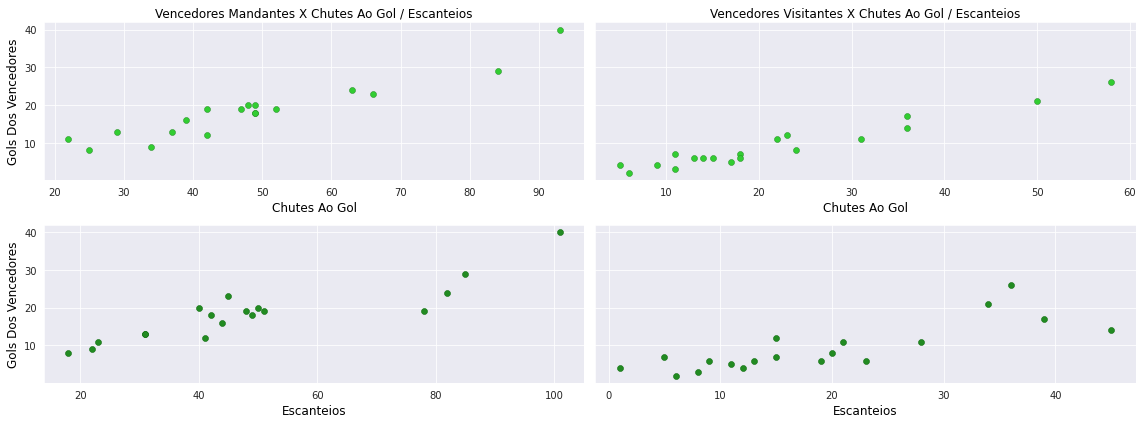

In [116]:
# Gráfico de dispersão para explicitar a correlação entre gols dos vencedores mandantes e visitantes em relação
# a escanteios e chutes ao gol contabilizáveis:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 6), sharey = True)
sns.scatterplot(data = df_br_21_man.query('mandante_placar > visitante_placar'
).groupby('vencedor').agg({'chutes_ao_gol': 'sum',
                           'mandante_placar': 'sum'}).reset_index().drop([0], axis = 0
).sort_values(['chutes_ao_gol', 'mandante_placar'], ascending = False), color = 'limegreen',
x = 'chutes_ao_gol', y = 'mandante_placar', ax = ax[0][0],
edgecolor = 'forestgreen')
ax[0][0].set_xlabel('Chutes Ao Gol', fontsize = 12, color = 'k')
ax[0][0].set_ylabel('Gols Dos Vencedores', fontsize = 12, color = 'k')
sns.scatterplot(data = df_br_21_man.query('mandante_placar > visitante_placar'
).groupby('vencedor').agg({'escanteios': 'sum',
                           'mandante_placar': 'sum'}).reset_index().drop([0], axis = 0
).sort_values(['escanteios', 'mandante_placar'], ascending = False), color = 'forestgreen',
x = 'escanteios', y = 'mandante_placar', ax = ax[1][0],
edgecolor = 'darkgreen')
ax[1][0].set_xlabel('Escanteios', fontsize = 12, color = 'k')
ax[1][0].set_ylabel('Gols Dos Vencedores', fontsize = 12, color = 'k')
sns.scatterplot(data = df_br_21_vis.query('visitante_placar > mandante_placar'
).groupby('vencedor').agg({'chutes_ao_gol': 'sum',
                           'visitante_placar': 'sum'}).reset_index().drop([0], axis = 0
).sort_values(['chutes_ao_gol', 'visitante_placar'], ascending = False), color = 'limegreen',
x = 'chutes_ao_gol', y = 'visitante_placar', ax = ax[0][1],
edgecolor = 'forestgreen')
ax[0][1].set_xlabel('Chutes Ao Gol', fontsize = 12, color = 'k')
ax[0][1].set_ylabel('')
sns.scatterplot(data = df_br_21_vis.query('visitante_placar > mandante_placar'
).groupby('vencedor').agg({'escanteios': 'sum',
                           'visitante_placar': 'sum'}).reset_index().drop([0], axis = 0
).sort_values(['escanteios', 'visitante_placar'], ascending = False), color = 'forestgreen',
x = 'escanteios', y = 'visitante_placar', ax = ax[1][1],
edgecolor = 'darkgreen')
ax[1][1].set_xlabel('Escanteios', fontsize = 12, color = 'k')
ax[1][1].set_ylabel('')
ax[0][0].set_title('Vencedores Mandantes X Chutes Ao Gol / Escanteios', fontsize = 12, color = 'k')
ax[0][1].set_title('Vencedores Visitantes X Chutes Ao Gol / Escanteios', fontsize = 12, color = 'k')
plt.tight_layout();

### Os times que terminaram como destaques no G4 do Brasileirão 2021 foram os times com mais gols marcados e também com mais chutes ao gol e escanteios contabilizados, logo por essa evidência coincidente há como considerarmos que um dos fatores principais estatisticamente que fizeram com que tais times tivessem tanto destaque foram:

#### (1) Como foram os times com mais chutes ao gol contabilizados no campeonato, por probabilidade há como considerarmos que quão mais um time chuta contra o gol do time adversário, maior é a probabilidade deste time marcar um gol e até terminar como vitorioso da partida.

##### (1b) Nesse caso, há como inferirmos hipoteticamente que os times do G4 (Atlético-MG, Palmeiras, Fortaleza, Flamengo) foram os times com mais gols marcados e mais chutes ao gol por terem táticas e técnicas de organização de equipe para marcar gol contra o time adversário, ou seja, além da quantidade de gols marcados e chutes ao gol contabilizados, há técnica, estratégia de equipe e precisão exata de chutes que favorecem com que os gols sejam marcados para tais times.

#### (2) Também os times vitoriosos com mais gols marcados, foram os times com mais escanteios cobrados, nesse caso por probabilidade há como inferirmos que quão mais escanteios cobrados por um time, maior é a probabilidade do time marcar gol no time adversário.

##### (2b) Especulativamente, há também o fator técnico de quão bons e estratégicos foram os times vitoriosos para que estes tivessem mais escanteios cobrados, e também tivessem mais qualidade, precisão e organização estratégica de equipe para marcar gol no time adversário por escanteios cobrados.





### Há uma correlação fortíssima de chutes ao gol e gols marcados pelos times vitoriosos dentro e fora de casa, ou seja, a tendência é que quão mais chutes ao gol o time vencedor acerta, mais gols correlativamente o time vencedor tende à marcar.

### Semelhantemente, a correlação entre escanteios cobrados e gols marcados pelos times vencedores é uma correlação fortíssima, que tende à ser uma correlação mais forte em relação à times mandantes do que para times visitantes.

### Enquanto a correlação entre chutes ao gol e gols marcados pelos times vitoriosos é mais forte em relação à times mandantes do que visitantes com uma diferença insignificante. 

### Resumidamente, fora de casa os times tendem à vencer e a ter mais probabilidade de marcarem gols ao chutarem mais ao gol do que os times mandantes, enquanto dentro de casa os times tendem à vencer e a ter mais probabilidade de marcarem gols ao cobrarem mais escanteios do que os times visitantes.

In [117]:
df_br_21_man.query('mandante_placar > visitante_placar').groupby('vencedor').agg({
    'mandante_placar': 'sum',
    'chutes_ao_gol': 'sum',
    'escanteios': 'sum'
}).join(df_br_21_vis.query('visitante_placar > mandante_placar').groupby('vencedor').agg({
    'visitante_placar': 'sum',
    'chutes_ao_gol': 'sum',
    'escanteios': 'sum'
}), how = 'inner', lsuffix = '_man', rsuffix = '_vis').corr()

,mandante_placar,chutes_ao_gol_man,escanteios_man,visitante_placar,chutes_ao_gol_vis,escanteios_vis
mandante_placar,1.000000,0.949299,0.894547,0.475673,0.556286,0.588705
chutes_ao_gol_man,0.949299,1.000000,0.887957,0.499130,0.579290,0.504912
escanteios_man,0.894547,0.887957,1.000000,0.525434,0.565031,0.590487
visitante_placar,0.475673,0.499130,0.525434,1.000000,0.962515,0.793714
chutes_ao_gol_vis,0.556286,0.579290,0.565031,0.962515,1.000000,0.823205
escanteios_vis,0.588705,0.504912,0.590487,0.793714,0.823205,1.000000


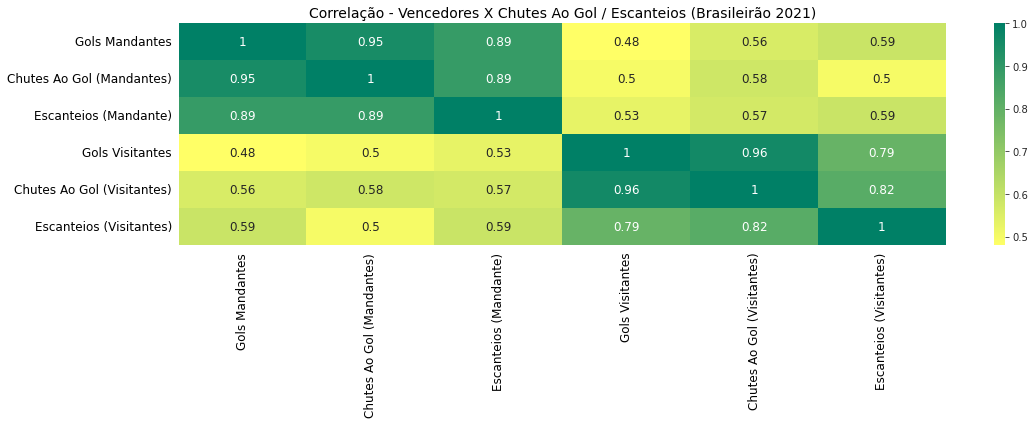

In [118]:
# Correlação expressa em um gráfico de heatmap entre chutes ao gol e escanteios em relação 
# aos times vencedores dentro ou fora de casa:
ax = sns.heatmap(data = df_br_21_man.query('mandante_placar > visitante_placar').groupby('vencedor').agg({
    'mandante_placar': 'sum',
    'chutes_ao_gol': 'sum',
    'escanteios': 'sum'
}).join(df_br_21_vis.query('visitante_placar > mandante_placar').groupby('vencedor').agg({
    'visitante_placar': 'sum',
    'chutes_ao_gol': 'sum',
    'escanteios': 'sum'
}), how = 'inner', lsuffix = '_man', rsuffix = '_vis').corr().round(2), annot = True,
yticklabels = ['Gols Mandantes', 'Chutes Ao Gol (Mandantes)',
               'Escanteios (Mandante)',
               'Gols Visitantes',
               'Chutes Ao Gol (Visitantes)',
               'Escanteios (Visitantes)'],
xticklabels = ['Gols Mandantes', 'Chutes Ao Gol (Mandantes)',
               'Escanteios (Mandante)',
               'Gols Visitantes',
               'Chutes Ao Gol (Visitantes)',
               'Escanteios (Visitantes)'],
               annot_kws = {'fontsize': 12}, cmap = 'summer_r',
               edgecolor = 'forestgreen')
plt.xticks(fontsize = 12, color = 'k')
plt.yticks(fontsize = 12, color = 'k')
ax.figure.set_size_inches(16, 6)
ax.set_title('Correlação - Vencedores X Chutes Ao Gol / Escanteios (Brasileirão 2021)', 
             fontsize = 14, color = 'k')
plt.tight_layout();

## (10) - Quais são os times que tiveram maior posse de bola em mais partidas no Brasileirão 2021?

In [119]:
# Agrupamento de times que tiveram maior posse de bola em mais partidas no Brasileirão 2021:
df_groupby_pos = df_br_21_man[df_br_21_man['%_posse_de_bola'] >= 55.0].groupby(['time_mandante', '%_posse_de_bola']
                                                              ).agg({'%_posse_de_bola': 'size'}).rename(
                                                                  columns = {'%_posse_de_bola': 'qtd_de_partidas'}
                                                              ).reset_index('%_posse_de_bola')
print(df_groupby_pos.shape)
df_groupby_pos.head()

(117, 2)


,%_posse_de_bola,qtd_de_partidas
time_mandante,,
América-MG,55.0,1
América-MG,56.0,2
América-MG,57.0,1
América-MG,59.0,1
América-MG,61.0,1


In [120]:
# Joint entre os times mandantes e visitantes, e suas correspondentes quantidades de partidas que tiveram maior posse de bola
# do que o time adversário:
df_groupby_pos = df_groupby_pos.join(df_br_21_vis[df_br_21_vis['%_posse_de_bola'] >= 55.0].groupby(['time_visitante', '%_posse_de_bola']
                                                              ).agg({'%_posse_de_bola': 'size'}).rename(
                                                                  columns = {'%_posse_de_bola': 'qtd_de_partidas'}
                                                              ).reset_index('%_posse_de_bola'), how = 'inner',
                lsuffix = '_man', rsuffix = '_vis').sort_values(['qtd_de_partidas_man', 'qtd_de_partidas_vis'],
                                                                ascending = False)
print(df_groupby_pos.shape)
df_groupby_pos.head()

(561, 4)


,%_posse_de_bola_man,qtd_de_partidas_man,%_posse_de_bola_vis,qtd_de_partidas_vis
Atlético-MG,60.0,3,63.0,3
Atlético-MG,60.0,3,66.0,3
Atlético-MG,60.0,3,67.0,2
Flamengo,64.0,3,58.0,2
Flamengo,64.0,3,60.0,2


In [121]:
# Resetação do índice e renomeação da coluna retirada do índice para 'times':
df_groupby_pos.reset_index(inplace = True)
df_groupby_pos.rename(columns = {'index': 'times'},
                      inplace = True)
df_groupby_pos.columns

Index(['times', '%_posse_de_bola_man', 'qtd_de_partidas_man',
       '%_posse_de_bola_vis', 'qtd_de_partidas_vis'],
      dtype='object')

In [122]:
# Quantidade de partidas de maior posse de bola em formato de lista em ordem decrescente:
df_groupby_pos.times.value_counts().to_list()

[80, 77, 72, 56, 36, 36, 35, 25, 20, 18, 18, 18, 18, 12, 10, 9, 9, 6, 4, 2]

In [123]:
# Os times com maior posse de bola em mais partidas no formato de lista em ordem decrescente:
df_groupby_pos.times.value_counts().index.to_list()

['Flamengo',
 'São Paulo',
 'Santos',
 'Corinthians',
 'Atlético-MG',
 'Fortaleza',
 'Grêmio',
 'Fluminense',
 'Bragantino',
 'Internacional',
 'Palmeiras',
 'Atlético-GO',
 'Athletico-PR',
 'Cuiaba',
 'Bahia',
 'Ceará',
 'Sport',
 'América-MG',
 'Juventude',
 'Chapecoense']

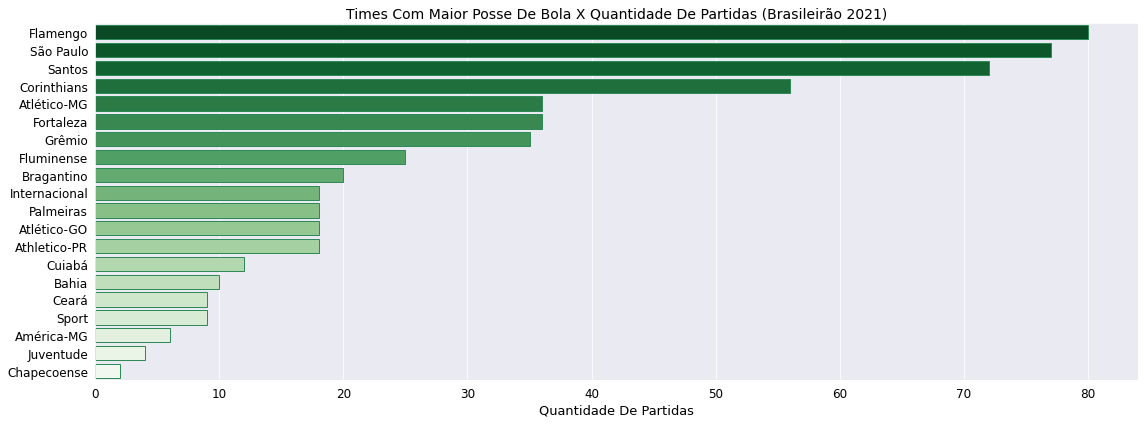

In [124]:
# Gráfico de barras para explicitar visualmente os times com maior posse de bola em mais partidas no Brasileirão 2021:
ax = sns.barplot(x = df_groupby_pos.times.value_counts().to_list(),
                 y = df_groupby_pos.times.value_counts().index.to_list(),
                 palette = 'Greens_r', edgecolor = 'seagreen')
ax.figure.set_size_inches(16, 6)
ax.set_yticklabels(['Flamengo','São Paulo','Santos','Corinthians','Atlético-MG','Fortaleza','Grêmio','Fluminense'
,'Bragantino','Internacional','Palmeiras','Atlético-GO','Athletico-PR','Cuiabá'
,'Bahia', 'Ceará','Sport','América-MG','Juventude', 'Chapecoense'],
                   color = 'k', fontsize = 12)
ax.set_xticklabels(list(range(0, 81, 10)), color = 'k', fontsize = 12)
ax.set_xlabel('Quantidade De Partidas', fontsize = 13, color = 'k')
ax.set_title('Times Com Maior Posse De Bola X Quantidade De Partidas (Brasileirão 2021)', fontsize = 14, color = 'k')
plt.tight_layout();

### Flamengo, São Paulo, Santos, Corinthians, Atlético-MG e Fortaleza são um dos times que tiveram maior posse de bola do que o time adversário em mais partidas contabilizadas. 

### Um dos times do G4 que estão nesse ranking são o Flamengo, o Atlético-MG e o Fortaleza, no G6 tivemos o Corinthias que teve um término na 5 posição do Brasileirão, o Santos que teve um término de campeonato na 10 posição e o São Paulo que teve um término em 13 posição do Brasileirão 2021.

### Curiosamente, o São Paulo foi um dos times com menos vitórias contabilizadas no Brasileirão 2021, porém foi o segundo time que teve uma maior posse de bola do que o time adversário em mais partidas no campeonato brasileiro como um todo. 

### Um dos times que foram rebaixados para a série B do Brasileirão foram um dos times que contabilizaram menos partidas em que tiveram uma maior posse de bola do que o time adversário, tal como Chapecoense, Sport Recife e Bahia são um desses times.

## (11) - Quais foram os times que tiveram uma precisão de passe acima da média em mais partidas do Brasileirão 2021?

In [125]:
# Verificação da média da precisão de passe por cada partida de cada time mandante:
df_br_21_man['%_precisão_de_passe'].mean()

81.15263157894736

In [126]:
# Verificação da média da precisão de passe por cada partida de cada time visitante:
df_br_21_vis['%_precisão_de_passe'].mean()

79.68684210526315

In [127]:
# Concatenação do do dataframe de times mandantes e visitantes para sabermos a média de precisão do passe
# no campeonato como um todo:
pd.concat([df_br_21_man.rename(
    columns = {'time_mandante': 'time'}
)[['time', '%_precisão_de_passe']], df_br_21_vis.rename(
    columns = {'time_visitante': 'time'}
)[['time', '%_precisão_de_passe']]])['%_precisão_de_passe'].mean()


80.41973684210527

In [128]:
# Agrupamento de times que tiveram uma precisão de passe acima da média
# por quantidade de partidas:
df_groupby_prec = df_br_21_man[df_br_21_man['%_precisão_de_passe'] > 80.5].groupby(['time_mandante',
                                                                   '%_precisão_de_passe']).agg({
                                                                       '%_precisão_de_passe': 'size'
                                                                   }).rename(
                                                                       columns = {'%_precisão_de_passe' : 'qtd_de_partidas'}
                                                                   ).reset_index('%_precisão_de_passe')
print(df_groupby_prec.shape)
df_groupby_prec.head()

(127, 2)


,%_precisão_de_passe,qtd_de_partidas
time_mandante,,
América-MG,81.0,4
América-MG,82.0,2
América-MG,84.0,1
América-MG,85.0,1
Athletico-PR,81.0,1


In [129]:
# Join entre a precisão de passe acima da média por quantidade de partida dos times mandantes e visitantes:
df_groupby_prec = df_groupby_prec.join(df_br_21_vis[df_br_21_vis['%_precisão_de_passe'] >= 80.0].groupby(['time_visitante',
                                                                   '%_precisão_de_passe']).agg({
                                                                       '%_precisão_de_passe': 'size'
                                                                   }).rename(
                                                                       columns = {'%_precisão_de_passe' : 'qtd_de_partidas'}
                                                                   ).reset_index('%_precisão_de_passe'),
                     how = 'inner', lsuffix = '_man', rsuffix = '_vis').sort_values([
                                                                                     'qtd_de_partidas_man',
                                                                                     'qtd_de_partidas_vis'
                     ], ascending = False)
print(df_groupby_prec.shape)
df_groupby_prec.head()

(832, 4)


,%_precisão_de_passe_man,qtd_de_partidas_man,%_precisão_de_passe_vis,qtd_de_partidas_vis
Flamengo,87.0,6,84.0,4
Flamengo,87.0,6,88.0,4
Athletico-PR,83.0,6,82.0,3
Athletico-PR,83.0,6,80.0,2
Athletico-PR,83.0,6,81.0,2


In [130]:
# Renomeação da coluna retirada do índice para 'time':
df_groupby_prec = df_groupby_prec.reset_index().rename(columns = {'index': 'time'})
df_groupby_prec.columns

Index(['time', '%_precisão_de_passe_man', 'qtd_de_partidas_man',
       '%_precisão_de_passe_vis', 'qtd_de_partidas_vis'],
      dtype='object')

In [131]:
# Vericação contável de times que tiveram uma precisão de passe acima da média em partidas contabilizadas:
df_groupby_prec.time.value_counts()

Fluminense       88
Corinthians      72
Atlético-MG      72
Flamengo         72
Grêmio           63
Santos           63
Palmeiras        42
Athletico-PR     42
Atlético-GO      36
São Paulo        36
Bragantino       35
Juventude        35
Internacional    30
Sport            28
Fortaleza        28
Bahia            24
Cuiaba           24
Chapecoense      20
América-MG       12
Ceará            10
Name: time, dtype: int64

In [132]:
# Times com precisão de passe acima da média em formato de lista:
# Correção do nome 'Cuiaba' para 'Cuiabá':
lista = df_groupby_prec.time.value_counts().index.str.replace('Cuiaba','Cuiabá').to_list()
lista

['Fluminense',
 'Corinthians',
 'Atlético-MG',
 'Flamengo',
 'Grêmio',
 'Santos',
 'Palmeiras',
 'Athletico-PR',
 'Atlético-GO',
 'São Paulo',
 'Bragantino',
 'Juventude',
 'Internacional',
 'Sport',
 'Fortaleza',
 'Bahia',
 'Cuiabá',
 'Chapecoense',
 'América-MG',
 'Ceará']

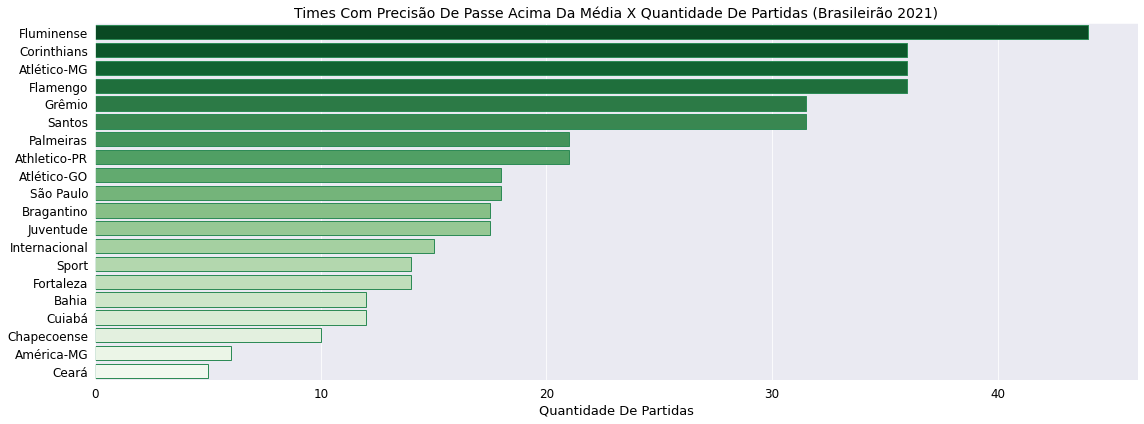

In [133]:
# Times com uma precisão acima da média em mais partidas contabilizadas no Brasileirão 2021:
# Em ordem decrescente:
ax = sns.barplot(x = df_groupby_prec.time.value_counts().to_list(),
                 y = df_groupby_prec.time.value_counts().index.to_list(),
                 palette = 'Greens_r', edgecolor = 'seagreen')
ax.figure.set_size_inches(16, 6)
ax.set_yticklabels(lista,
                   color = 'k', fontsize = 12)
ax.set_xticklabels(list(range(0, 81, 10)), color = 'k', fontsize = 12)
ax.set_xlabel('Quantidade De Partidas', fontsize = 13, color = 'k')
ax.set_title('Times Com Precisão De Passe Acima Da Média X Quantidade De Partidas (Brasileirão 2021)', fontsize = 14, color = 'k')
plt.tight_layout();

### O Fluminense foi o time com uma precisão de passe acima da média contabilizada em mais partidas no Brasileirão 2021, abaixo do Fluminense há o Corinthians, Atlético-MG e Flamengo como um dos times que tiveram uma precisão percentual de passe acima da média contável em mais partidas. 

### O Fluminense teve o término na 7 posição do Brasileirão 2021, enquanto Flamengo teve o término como vice-campeão, o Atlético-MG na 1 posição como campeão do campeonato e o Corinthians na 5 posição do Brasileirão 2021.

## (12) - Qual foi a formação de time mais utilizada pelos times nas partidas do Brasileirão 2021? Especialmente, em relação às formações mais utilizadas pelos times do G4 (Atlético-MG, Flamengo, Palmeiras, Fortaleza).

In [134]:
# Verificação de quais são as formações utilizadas pelos times mandantes no Brasileirão 2021 como um todo:
df_br_21_man.formacao_mandante.value_counts()

4-2-3-1      177
4-3-3         55
4-4-2         40
3-4-1-2       27
4-1-4-1       24
3-4-2-1        9
3-4-3          8
4-2-2-2        6
3-5-2          6
5-3-2          5
4-5-1          4
5-4-1          4
4-3-1-2        3
4-1-2-1-2      3
3-1-4-2        3
4-1-3-2        3
4-4-1-1        2
4-3-2-1        1
Name: formacao_mandante, dtype: int64

In [135]:
# Verificação de qual formação de time foi mais utilizada pelos times do G4 como mandantes:
df_br_21_man.query('time_mandante == ["Atlético-MG", "Flamengo", "Palmeiras", "Fortaleza"] & mandante_placar > visitante_placar')[
  'formacao_mandante'
].value_counts()

4-2-3-1    25
3-4-1-2    11
4-4-2       7
4-3-3       3
4-2-2-2     3
4-1-4-1     1
3-1-4-2     1
3-5-2       1
Name: formacao_mandante, dtype: int64

In [136]:
# Verificação de quais são as formações utilizadas pelos times visitantes no Brasileirão 2021 como um todo:
df_br_21_vis.formacao_visitante.value_counts()

4-2-3-1      178
4-3-3         37
4-1-4-1       36
4-4-2         36
3-4-1-2       25
3-4-3         14
3-4-2-1       13
3-5-2          9
4-5-1          8
5-4-1          6
3-1-4-2        5
4-1-2-1-2      3
4-2-2-2        3
4-1-3-2        2
5-3-2          2
3-5-1-1        1
4-4-1-1        1
4-3-1-2        1
Name: formacao_visitante, dtype: int64

In [137]:
# Verificação de qual formação de time foi mais utilizada pelos times do G4 como visitantes:
df_br_21_vis.query('time_visitante == ["Atlético-MG", "Flamengo", "Palmeiras", "Fortaleza"] & visitante_placar > mandante_placar'
).formacao_visitante.value_counts()

4-2-3-1    19
3-4-1-2     3
3-5-2       2
4-1-4-1     2
4-4-2       2
4-3-3       1
3-4-2-1     1
4-2-2-2     1
3-4-3       1
Name: formacao_visitante, dtype: int64

In [138]:
# Agrupamento dos times do G4 por quantidade de partidas em que usaram determinadas formações de time específicas:
# Times mandantes:
df_br_21_man.query('time_mandante == ["Atlético-MG", "Flamengo", "Palmeiras", "Fortaleza"] & mandante_placar > visitante_placar'
).groupby(['time_mandante', 'formacao_mandante']).agg({'formacao_mandante': 'size'})

formacao_mandante
time_mandante formacao_mandante                   
Atlético-MG   3-1-4-2                            1
              4-2-2-2                            1
              4-2-3-1                           12
              4-3-3                              1
              4-4-2                              2
Flamengo      4-2-2-2                            1
              4-2-3-1                            7
              4-3-3                              1
              4-4-2                              4
Fortaleza     3-4-1-2                           10
              3-5-2                              1
Palmeiras     3-4-1-2                            1
              4-1-4-1                            1
              4-2-2-2                            1
              4-2-3-1                            6
              4-3-3                              1
              4-4-2                              1

In [139]:
# Agrupamento dos times do G4 por quantidade de partidas em que usaram determinadas formações de time específicas:
# Times visitantes:
df_br_21_vis.query('time_visitante == ["Atlético-MG", "Flamengo", "Palmeiras", "Fortaleza"] & visitante_placar > mandante_placar'
).groupby(['time_visitante', 'formacao_visitante']).agg({'formacao_visitante': 'size'})

formacao_visitante
time_visitante formacao_visitante                    
Atlético-MG    4-1-4-1                              1
               4-2-2-2                              1
               4-2-3-1                              6
               4-3-3                                1
Flamengo       4-2-3-1                              6
               4-4-2                                2
Fortaleza      3-4-1-2                              3
               3-4-2-1                              1
               3-5-2                                2
Palmeiras      3-4-3                                1
               4-1-4-1                              1
               4-2-3-1                              7

### Basicamente, a formação mais utilizada por todos os times no Brasileirão 2021 é a formação 4-2-3-1 em que há dois zagueiros, dois laterais separadamente para a esquerda e para a direita, dois volantes, três meios-de-campo e um atacante central. 

### A formação 4-2-3-1 especialmente é a mais utilizada pelos times mais destacados do campeonato que terminaram o Brasileirão no G4.

### Não há como confirmar se a formação do time influencia em gols que o time marca ou em vitórias que o time obtêm, simplesmente porquê mesmo que os times do G4 utilizem mais a formação 4-2-3-1, isto não implica que tal formação de time foi um fator influenciável nas vitórias de tais times porque semelhantemente os demais times que não venceram tantas partidas e não marcaram tantos gols também utilizaram mais essa formação.


## (13) - Quais foram os times com às melhores e piores defesas do Brasileirão? Isto é, quais times sofreram menos e mais gols no campeonato como um todo?

In [140]:
# Agrupamento de times e a quantidade de gols que sofreram dos times visitantes no campeonato como um todo:
df_br_21_man.groupby('time_mandante').agg({'visitante_placar': 'sum'}).sort_values('visitante_placar',
                                                                                   ascending = True)

,visitante_placar
time_mandante,
América-MG,11
Atlético-MG,13
Sport,13
Santos,14
Atlético-GO,14
Fluminense,14
Ceará,14
Juventude,15
Flamengo,15


In [141]:
# Agrupamento de times e a quantidade de gols que sofreram dos times mandantes:
df_br_21_vis.groupby('time_visitante').agg({'mandante_placar': 'sum'}).sort_values('mandante_placar', ascending = True)

,mandante_placar
time_visitante,
Cuiaba,17
Palmeiras,17
Corinthians,18
Internacional,20
Atlético-MG,21
Flamengo,21
Atlético-GO,22
Fluminense,24
Sport,24


In [142]:
# Mergeamento da quantidade de gols sofridos por todos os times do Brasileirão 2021:
df_defesas = df_br_21_man.groupby('time_mandante').agg({'visitante_placar': 'sum'}).sort_values('visitante_placar',
                                                                                   ascending = True).reset_index(
                                                                                       
                                                                                   ).rename(
                                                                                       columns = {'time_mandante': 'time',
                                                                                                  'visitante_placar': 'gols'}
                                                                                   ).merge(df_br_21_vis.groupby('time_visitante').agg({'mandante_placar': 'sum'}).sort_values('mandante_placar',
                                                                                   ascending = True).reset_index(
                                                                                       
                                                                                   ).rename(
                                                                                       columns = {'time_visitante': 'time',
                                                                                                  'mandante_placar': 'gols'}
                                                                                   ), on = 'time', how = 'inner',
                                                                                   suffixes = ['_man', '_vis'])
print(df_defesas.shape)
df_defesas.head()

(20, 3)


,time,gols_man,gols_vis
0,América-MG,11,26
1,Atlético-MG,13,21
2,Sport,13,24
3,Santos,14,26
4,Atlético-GO,14,22


In [143]:
# Criação de uma coluna da quantidade total de gols sofridos por cada time no Brasileirão 2021 como um todo:
df_defesas = df_defesas.assign(total_gols = df_defesas['gols_man'] + df_defesas['gols_vis']).sort_values(by = 'total_gols')
df_defesas

,time,gols_man,gols_vis,total_gols
1,Atlético-MG,13,21,34
4,Atlético-GO,14,22,36
10,Corinthians,18,18,36
8,Flamengo,15,21,36
0,América-MG,11,26,37
2,Sport,13,24,37
13,Cuiaba,20,17,37
5,Fluminense,14,24,38
6,Ceará,14,24,38
9,São Paulo,15,24,39


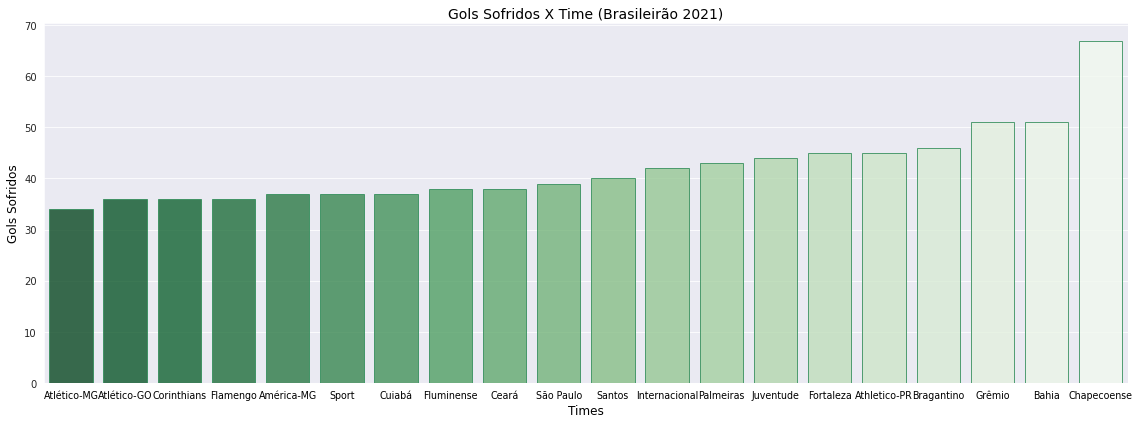

In [144]:
# Gráficos de colunas em ordem crescente do time que sofreu menos gols até o time que sofreu mais gols 
# No Brasileirão 2021 como um todo:
ax = sns.barplot(data = df_defesas,
                 x = 'time', 
                 y = 'total_gols',
                 palette = 'Greens_r',
                 edgecolor = 'seagreen',
                 alpha = 0.8)
ax.figure.set_size_inches(16, 6)
ax.set_xticklabels(df_defesas.set_index('time').index.str.replace('Cuiaba', 'Cuiabá').to_list(), color = 'k', fontsize = 9.5)
ax.set_xlabel('Times', fontsize = 12, color = 'k')
ax.set_ylabel('Gols Sofridos', fontsize = 12, color = 'k')
ax.set_title('Gols Sofridos X Time (Brasileirão 2021)', fontsize = 14, color = 'k')
plt.tight_layout();

### O gráfico de colunas acima explicita demonstrativamente que o Atlético-MG e o Atlético-GO, Corinthians e o Flamengo (os três empatados) foram um dos times com às melhores defesas do Brasileirão 2021, por terem sofrido menos gols no campeonato como um todo.

### Atlético-MG como campeão do campeonato foi o time com menos gols sofridos, abaixo há o Atlético-GO que teve um término de campeonato na nona posição, o Flamengo teve um término como vice-campeão e o Corinthians teve o término de campeonato na quinta posição.

### Grêmio, Bahia e Chapecoense que foram os times rebaixados para a série B do Brasileirão, também foram expectantemente os times com mais gols sofridos no Brasileirão 2021.

### Curiosamente, o Sport que foi um dos times rebaixados para a série B, foi um dos times com menos gols sofridos no campeonato, com um gol de diferença para os times com às melhores defesas da competição. 

### Enquanto paralelamente o Palmeiras e o Fortaleza que foram um dos times que terminaram o campeonato no G4, foram paradoxalmente times com mais gols sofridos em comparação ao Sport e ao Cuiabá que foram times rebaixados ou que estiveram próximos ao rebaixamento. 

## (14) - Traga informações sobre estatísticas secundárias dos times: 
### (1) Qual foi o time que teve mais escanteios cobrados, teve mais cartões vermelhos ou amarelos recebidos, ou qual time que marcou mais faltas no campeonato e teve mais impedimentos registrados? 

### (2) - E qual é a média por partida de cada estatística para cada time?

In [145]:
# Agrupamento da quantidade de cartões, impedimentos e faltas registradas por cada time no Brasileirão 2021:
df_est_br_21 = df_br_21_man.groupby('time_mandante').agg({'faltas': 'sum',
                                            'cartao_amarelo': 'sum',
                                            'cartao_vermelho': 'sum',
                                            'impedimentos': 'sum'}).join(
                                                df_br_21_vis.groupby('time_visitante').agg({'faltas': 'sum',
                                            'cartao_amarelo': 'sum',
                                            'cartao_vermelho': 'sum',
                                            'impedimentos': 'sum'})
                                            , lsuffix = '_man', rsuffix = '_vis' ).reset_index().rename(columns = {'time_mandante': 'time'})
print(df_est_br_21.shape)
df_est_br_21.head()

(20, 9)


,time,faltas_man,cartao_amarelo_man,cartao_vermelho_man,impedimentos_man,faltas_vis,cartao_amarelo_vis,cartao_vermelho_vis,impedimentos_vis
0,América-MG,269,30,1,39,283,32,0,32
1,Athletico-PR,271,39,1,19,296,43,2,19
2,Atlético-GO,275,48,1,28,262,42,1,20
3,Atlético-MG,282,37,1,23,294,39,1,26
4,Bahia,284,46,1,25,301,42,4,17


In [146]:
# Criação de uma coluna que totaliza a quantidade de faltas, cartões e impedimentos registrados por cada time:
df_est_br_21 = df_est_br_21.assign(total_faltas = df_est_br_21['faltas_man'] + df_est_br_21['faltas_vis'],
                    total_cart_amarelo = df_est_br_21['cartao_amarelo_man'] + df_est_br_21['cartao_amarelo_vis'],
                    total_cart_vermelho = df_est_br_21['cartao_vermelho_man'] + df_est_br_21['cartao_vermelho_vis'],
                    total_impedimentos = df_est_br_21['impedimentos_man'] + df_est_br_21['impedimentos_vis'],
                    )
print(df_est_br_21.shape)
df_est_br_21.head()

(20, 13)


,time,faltas_man,cartao_amarelo_man,cartao_vermelho_man,impedimentos_man,faltas_vis,cartao_amarelo_vis,cartao_vermelho_vis,impedimentos_vis,total_faltas,total_cart_amarelo,total_cart_vermelho,total_impedimentos
0,América-MG,269,30,1,39,283,32,0,32,552,62,1,71
1,Athletico-PR,271,39,1,19,296,43,2,19,567,82,3,38
2,Atlético-GO,275,48,1,28,262,42,1,20,537,90,2,48
3,Atlético-MG,282,37,1,23,294,39,1,26,576,76,2,49
4,Bahia,284,46,1,25,301,42,4,17,585,88,5,42


In [147]:
# Ordenação dos times que mais marcaram faltas, mais receberam cartões, tiveram impedimentos registrados:
df_est_br_21[['time','total_faltas', 'total_cart_amarelo',
              'total_cart_vermelho', 'total_impedimentos']].sort_values(by = ['total_faltas', 'total_cart_amarelo',
              'total_cart_vermelho', 'total_impedimentos'], ascending = False)

,time,total_faltas,total_cart_amarelo,total_cart_vermelho,total_impedimentos
14,Internacional,660,105,11,42
19,São Paulo,644,94,4,85
13,Grêmio,643,101,7,34
12,Fortaleza,591,87,4,80
18,Sport,587,87,4,39
4,Bahia,585,88,5,42
6,Ceará,577,85,4,52
3,Atlético-MG,576,76,2,49
15,Juventude,572,88,3,41
5,Bragantino,571,89,2,33


In [148]:
# Agrupamento de time e suas respectivas média de faltas, impedimentos registrados e escanteios por partida 
# No Brasileirão 2021 para times mandantes:
# Ordenação decrescente:
df_br_21_man.groupby('time_mandante').agg({
    'escanteios': ['sum', 'mean'],
    'faltas': 'mean',
    'impedimentos': 'mean'
}).sort_values(by = [('escanteios', 'sum'),
                     ('escanteios', 'mean'),
                     ('faltas', 'mean'),
                     ('impedimentos', 'mean')], ascending = False).round(2)

escanteios       faltas impedimentos
                     sum  mean   mean         mean
time_mandante                                     
Palmeiras            137  7.21  13.79         2.37
Flamengo             131  6.89  16.47         1.53
Grêmio               130  6.84  17.53         0.95
Bahia                125  6.58  14.95         1.32
São Paulo            119  6.26  16.58         2.05
América-MG           119  6.26  14.16         2.05
Corinthians          119  6.26  11.00         0.74
Atlético-MG          115  6.05  14.84         1.21
Atlético-GO          114  6.00  14.47         1.47
Athletico-PR         111  5.84  14.26         1.00
Internacional        110  5.79  17.37         1.47
Ceará                109  5.74  15.47         1.21
Chapecoense          106  5.58  15.00         1.58
Santos               103  5.42  15.53         1.53
Bragantino            98  5.16  15.26         0.89
Fortaleza             94  4.95  16.05         2.26
Sport                 88  4.63  15.74         1.00
Fluminense            85  4.47  16.53         1.16
Juventude             83  4.37  15.21         1.16
Cuiaba                79  4.16  14.16         1.53

In [149]:
# Agrupamento de time e suas respectivas média de faltas, impedimentos registrados e escanteios por partida 
# No Brasileirão 2021 para times visitantes:
# Ordenação decrescente:
df_br_21_vis.groupby('time_visitante').agg({
    'escanteios': ['sum', 'mean'],
    'faltas': 'mean',
    'impedimentos': 'mean'
}).sort_values( 
              [ ('escanteios', 'sum'),
               ('escanteios', 'mean'),
               ('faltas', 'mean'),
               ('impedimentos', 'mean')], ascending = False).round(2)

escanteios       faltas impedimentos
                      sum  mean   mean         mean
time_visitante                                     
Atlético-MG           127  6.68  15.47         1.37
Grêmio                112  5.89  16.32         0.84
Flamengo               99  5.21  13.42         1.47
São Paulo              95  5.00  17.32         2.42
Ceará                  90  4.74  14.89         1.53
Corinthians            88  4.63  11.05         0.89
Fluminense             87  4.58  12.58         1.37
Santos                 86  4.53  12.53         1.58
Internacional          84  4.42  17.37         0.74
Atlético-GO            84  4.42  13.79         1.05
Bahia                  82  4.32  15.84         0.89
Fortaleza              82  4.32  15.05         1.95
Bragantino             82  4.32  14.79         0.84
Chapecoense            80  4.21  14.74         1.26
Palmeiras              80  4.21  14.53         1.37
América-MG             76  4.00  14.89         1.68
Athletico-PR           74  3.89  15.58         1.00
Sport                  74  3.89  15.16         1.05
Juventude              61  3.21  14.89         1.00
Cuiaba                 60  3.16  13.89         1.95

In [150]:
# Agrupamento de times por quantidade de escanteios cobrados em todo o Brasileirão 2021
## e média de escanteios cobrados em cada partida:
df_br_21_escanteios = df_br_21_man.groupby('time_mandante').agg({
    'escanteios': ['sum', 'mean']
}).reset_index().rename(columns = {'time_mandante': 'time'}).sort_values(
    by = [('escanteios', 'sum'), ('escanteios', 'mean')]
, ascending = False).round(2).merge(
    df_br_21_vis.groupby('time_visitante').agg({
    'escanteios': ['sum', 'mean']
}).reset_index().rename(columns = {'time_visitante': 'time'}).sort_values(
    by = [('escanteios', 'sum'), ('escanteios', 'mean')]
, ascending = False).round(2), on = 'time', how = 'inner', suffixes = ['_man', '_vis'])
print(df_br_21_escanteios.shape)
df_br_21_escanteios.head()

(20, 5)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


time escanteios_man       escanteios_vis      
                         sum  mean            sum  mean
0   Palmeiras            137  7.21             80  4.21
1    Flamengo            131  6.89             99  5.21
2      Grêmio            130  6.84            112  5.89
3       Bahia            125  6.58             82  4.32
4  América-MG            119  6.26             76  4.00

In [151]:
# Criação de novas colunas com o total de escanteios cobrados de cada time no Brasileirão 2021
# e criação da coluna de média de escanteios cobrados por partida de cada time:
df_br_21_escanteios.assign(total_escanteios = df_br_21_escanteios[('escanteios_man', 'sum')] + 
                           df_br_21_escanteios[('escanteios_vis', 'sum')],
                           media_escanteios = df_br_21_escanteios[('escanteios_man', 'mean')] + 
                           df_br_21_escanteios[('escanteios_vis', 'mean')])[['time','total_escanteios',
                                                                              'media_escanteios']].sort_values(
                               by = ['total_escanteios', 'media_escanteios']
                           , ascending = False).head(10)

,time,total_escanteios,media_escanteios
,,,
2,Grêmio,242,12.73
7,Atlético-MG,242,12.73
1,Flamengo,230,12.10
0,Palmeiras,217,11.42
6,São Paulo,214,11.26
3,Bahia,207,10.90
5,Corinthians,207,10.89
11,Ceará,199,10.48
8,Atlético-GO,198,10.42


In [152]:
# Agrupamento de times pela quantidade de passes trocados em todo o Brasileirão por cada time 
# e média de passes trocados em cada partida por cada time:
df_br_21_passes = df_br_21_man.groupby('time_mandante').agg({
    'passes': ['sum', 'mean']
}).reset_index().rename(columns = {'time_mandante': 'time'}).sort_values(by = [('passes', 'sum'),
               ('passes', 'mean')], ascending = False).round(2).merge(df_br_21_vis.groupby('time_visitante').agg({
    'passes': ['sum', 'mean']
}).reset_index().rename(columns = {'time_visitante': 'time'}).sort_values(by = [('passes', 'sum'),
                     ('passes', 'mean')], ascending = False).round(2), on = 'time', how = 'inner',
                     suffixes = ['_man', '_vis'])
print(df_br_21_passes.shape)
df_br_21_passes.head()

(20, 5)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


time passes_man         passes_vis        
                       sum    mean        sum    mean
0   Corinthians      10420  548.42       9774  514.42
1      Flamengo      10333  543.84       9387  494.05
2   Atlético-MG       9435  496.58       9582  504.32
3        Santos       9069  477.32       8356  439.79
4  Athletico-PR       9014  474.42       7134  375.47

In [153]:
# Criação de colunas para representar o total de passes trocados por cada time no Brasileirão 2021
# e média de passes trocados em cada partida por cada time:
df_br_21_passes.assign(total_passes = df_br_21_passes[('passes_man', 'sum')] + df_br_21_passes[('passes_vis', 'sum')],
                       media_passes = df_br_21_passes[('passes_man', 'mean')] + df_br_21_passes[('passes_vis', 'mean')])[[
'time', 'total_passes', 'media_passes'
                       ]].sort_values(by = 
                                      ['total_passes',
                                       'media_passes'], ascending = False).head(10)


,time,total_passes,media_passes
,,,
0,Corinthians,20194,1062.84
1,Flamengo,19720,1037.89
2,Atlético-MG,19017,1000.90
5,São Paulo,17586,925.58
3,Santos,17425,917.11
6,Grêmio,17188,904.63
11,Fluminense,16310,858.42
8,Internacional,16236,854.53
4,Athletico-PR,16148,849.89


### Basicamente, o Internacional foi o time que teve mais faltas marcadas, mais cartões amarelos e vermelhos recebidos, e separadamente o São Paulo foi um dos times com mais impedimentos registrados.

### O Internacional teve um término de campeonato na 12 posição e o São Paulo na 13 posição.

### O Atlético-MG e o Grêmio foram um dos dois times que cobraram mais escanteios em todo o Brasileirão e tiveram a média mais alta de escanteios cobrados por partida.

### Curiosamente, o Atlético-MG foi o time campeão do Brasileirão e inversamente o Grêmio foi um dos times rebaixados para a série B, tal informação mínima demonstra que a quantidade de escanteios cobrados necessariamente não influencia nas vitórias e num bom desempenho dos times em uma partida. 

### Abaixo do Atlético-MG e do Grêmio, há dois times do G4, que são Palmeiras e Flamengo como um dos times com mais escanteios cobrados no Brasileirão 2021 e com uma média alta de escanteios cobrados por partida.

### Em relação à passes trocados no Brasileirão 2021, o Corinthians, Flamengo e Atlético-MG foram um dos times que mais trocaram passes no Brasileirão e tiveram às médias mais altas de passes trocados por partida. 

### Conforme às expectativas, tais times com mais passes trocados no campeonato e com uma média mais alta de passes trocados por partida são os times inclusos dentro ou próximo ao G4.

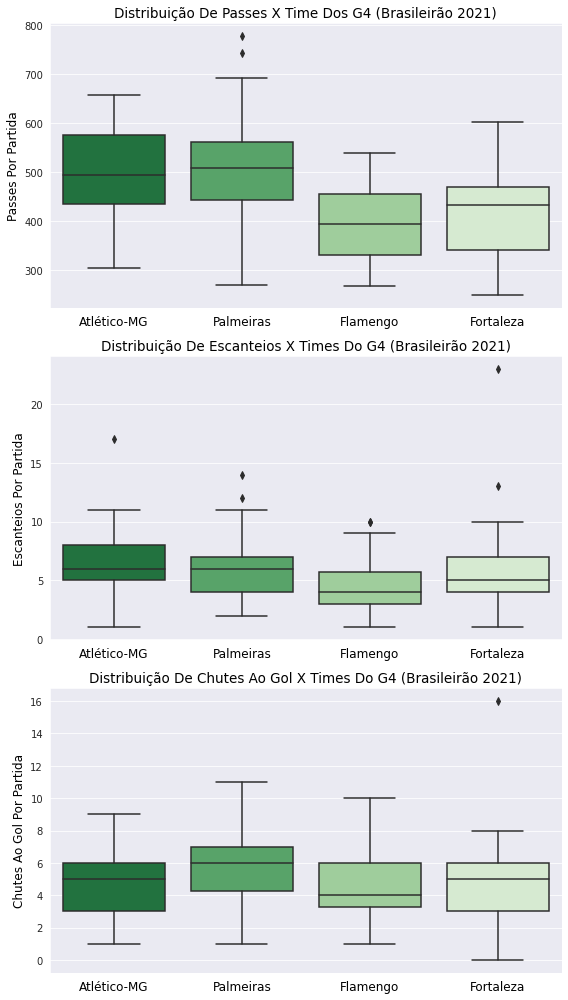

In [159]:
# Gráfico de boxplot para representar visualmente a distribuição de escanteios cobrados
#, passes trocados e chutes ao gol realizados pelos times do G4 (Atlético-MG, Palmeiras, Flamengo, Fortaleza):
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (8, 14))
sns.boxplot(data = pd.concat([df_br_21_man[df_br_21_man.time_mandante.isin(['Atlético-MG', 'Palmeiras',
                                                   'Flamengo', 'Fortaleza'])].rename(
                                                       columns = {'time_mandante': 'time'}
                                                   )[['time', 'passes']],
          df_br_21_vis[df_br_21_vis.time_visitante.isin(['Atlético-MG', 'Palmeiras',
                                                   'Flamengo', 'Fortaleza'])].rename(
                                                       columns = {'time_visitante': 'time'}
                                                   )[['time', 'passes']]]),
            y = 'passes', x = 'time',
            palette = 'Greens_r', ax = ax[0])
ax[0].set_xticklabels(['Atlético-MG', 'Palmeiras','Flamengo', 'Fortaleza'], color = 'k', fontsize = 12)
ax[0].set_ylabel('Passes Por Partida', color = 'k', fontsize = 12)
ax[0].set_xlabel('')
ax[0].set_title('Distribuição De Passes X Time Dos G4 (Brasileirão 2021)',
                fontsize = 13.5, color = 'k')
sns.boxplot(data = pd.concat([df_br_21_man[df_br_21_man.time_mandante.isin(['Atlético-MG', 'Palmeiras',
                                                   'Flamengo', 'Fortaleza'])].rename(
                                                       columns = {'time_mandante': 'time'}
                                                   )[['time', 'escanteios']],
                   df_br_21_vis[df_br_21_vis.time_visitante.isin(['Atlético-MG', 'Palmeiras',
                                                   'Flamengo', 'Fortaleza'])].rename(
                                                       columns = {'time_visitante': 'time'}
                                                   )[['time', 'escanteios']]]), y = 'escanteios', x = 'time',palette = 'Greens_r', ax = ax[1])
ax[1].set_xticklabels(['Atlético-MG', 'Palmeiras','Flamengo', 'Fortaleza'], color = 'k', fontsize = 12)
ax[1].set_ylabel('Escanteios Por Partida', color = 'k', fontsize = 12)
ax[1].set_xlabel('')
ax[1].set_title('Distribuição De Escanteios X Times Do G4 (Brasileirão 2021)', fontsize = 13.5, color = 'k')
sns.boxplot(data = pd.concat([df_br_21_man[df_br_21_man.time_mandante.isin(['Atlético-MG', 'Palmeiras',
                                                   'Flamengo', 'Fortaleza'])].rename(
                                                       columns = {'time_mandante': 'time'}
                                                   )[['time', 'chutes_ao_gol']],
                   df_br_21_vis[df_br_21_vis.time_visitante.isin(['Atlético-MG', 'Palmeiras',
                                                   'Flamengo', 'Fortaleza'])].rename(
                                                       columns = {'time_visitante': 'time'}
                                                   )[['time', 'chutes_ao_gol']]]), y = 'chutes_ao_gol', x = 'time',palette = 'Greens_r', ax = ax[2])
ax[2].set_xticklabels(['Atlético-MG', 'Palmeiras','Flamengo', 'Fortaleza'], color = 'k', fontsize = 12)
ax[2].set_ylabel('Chutes Ao Gol Por Partida', color = 'k', fontsize = 12)
ax[2].set_xlabel('')
ax[2].set_title('Distribuição De Chutes Ao Gol X Times Do G4 (Brasileirão 2021)', fontsize = 13.5, color = 'k')
plt.tight_layout();

### O Atlético-MG é um dos times do G4 com uma distribuição maior de passes e escanteios cobrados por partida, enquanto o Palmeiras é o time com uma maior distribuição concentrada de chutes ao gol realizados por partida. 

In [160]:
# Atribuição do dataframe de marcadores dos gols do campeonato de 2014 até 2021:
df_gols_br = pd.read_csv('/content/drive/MyDrive/campeonato-brasileiro-gols.csv')
print(df_gols_br.shape)
df_gols_br.head()

(7081, 5)


,partida_id,rodada,clube,atleta,minuto
0,4607,1,Fluminense,Rafael Sóbis,31
1,4607,1,Fluminense,Fred,45
2,4607,1,Fluminense,Nirley da Silva Fonseca,59
3,4608,1,Internacional,Charles Aránguiz,6
4,4610,1,Athletico-PR,Dráusio Luis Salla Gil,16


In [165]:
# Seleção de marcadores de gols exclusivamente do Brasileirão 2021:
df_gols_br_21 = df_gols_br[df_gols_br.partida_id.between(7266, 7645)]
print(df_gols_br_21.shape)
df_gols_br_21.head()

(842, 5)


,partida_id,rodada,clube,atleta,minuto
6239,7266,1,Cuiaba,Jonathan Cafú,29
6240,7266,1,Cuiaba,Elton Rodrigues Brandão,87
6241,7266,1,Juventude,Wescley,43
6242,7266,1,Juventude,Matheus Peixoto,45+1
6243,7267,1,Bahia,Thaciano,46


In [186]:
# Verificação da data em que tal dataframe de marcadores de gols do Brasileirão foi registrado:
df.loc[df['ID'] == 4607].data.dt.year

4606    2014
Name: data, dtype: int64

In [187]:
# Top 10 dos jogadores que mais marcaram gols do Brasileirão 2014 até o 2021:
df_gols_br.atleta.value_counts().head(10)

Gabriel Barbosa                   92
Fred                              80
Diego Souza                       80
Bruno Henrique                    58
Ricardo Oliveira                  56
Gilberto Oliveira Souza Junior    50
Willian Gomes de Siqueira         49
Wellington Paulista               46
Rafael Moura                      46
Eduardo Pereira Rodrigues         46
Name: atleta, dtype: int64

In [195]:
# Agrupamento da quantidade de gols marcado por cada jogador no Brasileirão 2021:
df_gols_br_21 = df_gols_br_21.groupby('atleta').agg({'atleta': 'size'}).rename(columns =
                                                               {'atleta': 'gols'}).reset_index().sort_values('gols',
                                                                                                             ascending = False)
print(df_gols_br_21.shape)
df_gols_br_21.head(10)

(300, 2)


,atleta,gols
105,Hulk,19
91,Gilberto Oliveira Souza Junior,15
199,Michael Richard Delgado de Oliveira,14
1,Ademir,13
17,Artur Victor Guimarães,12
75,Gabriel Barbosa,12
293,Ytalo José dos Santos,12
294,Yuri Alberto,12
54,Edenílson Andrade dos Santos,11
24,Bruno Henrique,11


In [204]:
# Soma cumulativa de gols marcados em todo o Brasileirão 2021, seguido com a porcentagem de gols marcado por cada jogador em relação 
# proporcional à quantidade de gols em todo o Brasileirão 2021:
df_gols_br_21 = df_gols_br_21.assign(gols_acumulado = df_gols_br_21['gols'].cumsum(),
                                     perc_gols = (df_gols_br_21['gols'] / df_gols_br_21.gols_acumulado[146] * 100).round(2))
df_gols_br_21

,atleta,gols,gols_acumulado,perc_gols
105,Hulk,19,19,2.26
91,Gilberto Oliveira Souza Junior,15,34,1.78
199,Michael Richard Delgado de Oliveira,14,48,1.66
1,Ademir,13,61,1.54
17,Artur Victor Guimarães,12,73,1.43
...,...,...,...,...
87,Gabriel Teixeira,1,838,0.12
210,Oliveira,1,839,0.12
88,Gabriel Veron,1,840,0.12
89,Geovane,1,841,0.12


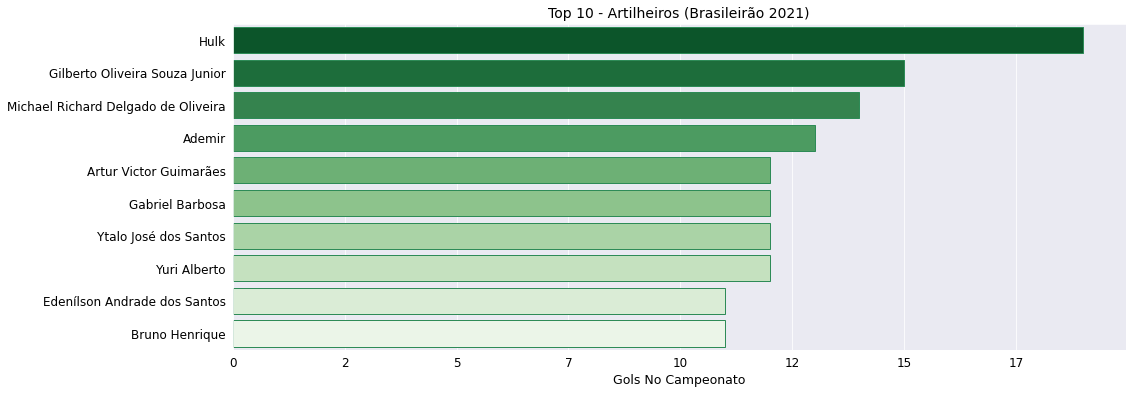

In [215]:
# Gráfico de barras para representar visualmente a quantidade de gols marcados pelos dez maiores artilheiros do Brasileirão 2021:
ax = sns.barplot(y = df_gols_br_21.atleta.head(10),
                 x = df_gols_br_21.gols.head(10),
                 palette = 'Greens_r',
                 edgecolor = 'seagreen')
ax.figure.set_size_inches(16, 6)
ax.set_ylabel('')
ax.set_yticklabels(df_gols_br_21.atleta.to_list()[:10], color = 'k', fontsize = 12)
ax.set_xticklabels([0, 2, 5, 7, 10, 12, 15, 17], color = 'k', fontsize = 12)
ax.set_xlabel('Gols No Campeonato', fontsize = 12.5, color = 'k')
ax.set_title('Top 10 - Artilheiros (Brasileirão 2021)', fontsize = 14, color = 'k');

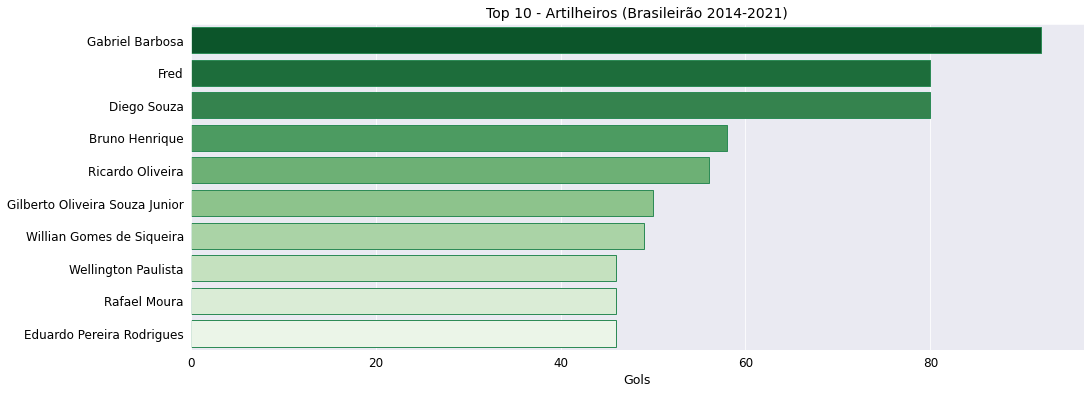

In [226]:
# Gráfico de barras para representar visualmente a quantidade de gols marcados pelos dez maiores artilheiros desde 
# o Brasileirão 2014 até 2021:
ax = sns.barplot(y = df_gols_br.atleta.value_counts().index.to_list()[:10],
                 x = df_gols_br.atleta.value_counts().to_list()[:10],
                 palette = 'Greens_r',
                 edgecolor = 'seagreen')
ax.figure.set_size_inches(16, 6)
ax.set_ylabel('')
ax.set_yticklabels(df_gols_br.atleta.value_counts().index.to_list()[:10], color = 'k', fontsize = 12)
ax.set_xticklabels([0, 20, 40, 60, 80], color = 'k', fontsize = 12)
ax.set_xlabel('Gols', fontsize = 12.5, color = 'k')
ax.set_title('Top 10 - Artilheiros (Brasileirão 2014-2021)', fontsize = 14, color = 'k');

### Hulk foi o artilheiro do Brasileirão 2021 com mais gols marcados em todo o campeonato.

### Gabriel Barbosa do Flamengo foi o jogador artilheiro com mais gols marcados somaticamente do Brasileirão 2014 até o de 2021, e interessantemente foi o quinto artilheiro com mais gols marcados no Brasileirão 2021.

## ANÁLISE EXPLORATÓRIA DE DADOS DO BRASILEIRÃO FINALIZADA.